In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import colors
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import random
from geneticalgorithm import geneticalgorithm as ga
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import optuna
import warnings
warnings.filterwarnings('ignore')

C:\Users\oguzd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)
palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

In [3]:
data = pd.read_csv("C:\\Users\\oguzd\\OneDrive\\Masaüstü\\YAP470\\Proje\\projem\\marketing_campaign.csv", sep='\t')
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [4]:
data.describe().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
data[data["Income"].isna()]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
10    15-11-2013       11         5  ...                  7             0   
27    20-02-2013       19         5  ...                  1             0   
43    05-11-2013       80        81  ...                  2             0   
48    01-01-2014       96        48  ...                  6             0   
58    17-06-2013       57        11  ...                  6             0   
71    14-09-2012       25        25  ...                  8             0   
90    19-11-2012        4       230  ...                  9             0   
91    27-05-2014       45         7  ...                  7             0   
92    23-11-2013       87       445  ...                  1             0   
128   11-07-2013       23       352  ...                  6             0   
133   11-08-2013       96       231  ...                  4             0   
312   03-06-2013       69       861  ...                  3             0   
319   23-08-2013       67       738  ...                  7             0   
1379  01-04-2013       39       187  ...                  5             0   
1382  03-09-2012       87        19  ...                  5             0   
1383  12-01-2014       49         5  ...                  7             0   
1386  02-03-2014       17        25  ...                  7             0   
2059  18-05-2013       52       375  ...                  3             0   
2061  31-05-2013       82        23  ...                  6             0   
2078  03-03-2013       82        71  ...                  8             0   
2079  23-06-2013       83       161  ...                  6             0   
2081  18-10-2013       95       264  ...                  7             0   
2084  30-10-2013       75       532  ...                  1             0   
2228  12-08-2012       53        32  ...                  0             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedC

In [8]:
data_nullvals_eliminated = data.dropna()
data_nullvals_eliminated.reset_index(drop=True, inplace=True)
data_nullvals_eliminated

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2211  10870        1967  Graduation        Married  61223.0        0   
2212   4001        1946         PhD       Together  64014.0        2   
2213   7270        1981  Graduation       Divorced  56981.0        0   
2214   8235        1956      Master       Together  69245.0        0   
2215   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2211         1  13-06-2013       46       709  ...                  5   
2212         1  10-06-2014       56       406  ...                  7   
2213         0  25-01-2014       91       908  ...                  6   
2214         1  24-01-2014        8       428  ...                  3   
2215         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2211             0             0             0             0             0   
2212             0             0             0             1             0   
2213             0             1             0             0             0   
2214             0             0             0             0             0   
2215             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2211         0              3         11         0  
2212         0              3         11         0  
2213         0              3         11         0  
2214         0              3         11         0  
2215         0              3         11         1  

[2216 rows x 29 columns]

In [9]:
data_nullvals_eliminated.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [10]:
current_year = 2023
data_nullvals_eliminated["Dt_Customer"] = pd.to_datetime(data_nullvals_eliminated["Dt_Customer"], format="%d-%m-%Y")
years_extracted = data_nullvals_eliminated["Dt_Customer"].dt.year
Years_Enrolled = []

for i in range(len(years_extracted)):
    Years_Enrolled.append(current_year - years_extracted[i])

column_index = data_nullvals_eliminated.columns.get_loc("Dt_Customer")
data_nullvals_eliminated.insert(column_index, "Years_Enrolled", Years_Enrolled)
data_nullvals_eliminated.insert(column_index+1, "Enrollment_Start", years_extracted)

data_nullvals_eliminated = data_nullvals_eliminated.drop("Dt_Customer", axis=1)
data_nullvals_eliminated


ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2211  10870        1967  Graduation        Married  61223.0        0   
2212   4001        1946         PhD       Together  64014.0        2   
2213   7270        1981  Graduation       Divorced  56981.0        0   
2214   8235        1956      Master       Together  69245.0        0   
2215   9405        1954         PhD        Married  52869.0        1   

      Teenhome  Years_Enrolled  Enrollment_Start  Recency  ...  \
0            0              11              2012       58  ...   
1            1               9              2014       38  ...   
2            0              10              2013       26  ...   
3            0               9              2014       26  ...   
4            0               9              2014       94  ...   
...        ...             ...               ...      ...  ...   
2211         1              10              2013       46  ...   
2212         1               9              2014       56  ...   
2213         0               9              2014       91  ...   
2214         1               9              2014        8  ...   
2215         1              11              2012       40  ...   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2211                  5             0             0             0   
2212                  7             0             0             0   
2213                  6             0             1             0   
2214                  3             0             0             0   
2215                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
0                0             0         0              3         11         1  
1                0             0         0              3         11         0  
2                0             0         0              3         11         0  
3                0             0         0              3         11         0  
4                0             0         0              3         11         0  
...            ...           ...       ...            ...        ...       ...  
2211             0             0         0              3         11         0  
2212             1             0         0              3         11         0  
2213             0             0         0              3         11         0  
2214             0             0         0              3         11         0  
2215             0             0         0              3         11         1  

[2216 rows x 30 columns]

In [11]:
print(data_nullvals_eliminated.isna().sum())
object_columns_eliminated_df = data_nullvals_eliminated.select_dtypes(include=["object"]).columns.to_list()
object_columns_eliminated_df

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Years_Enrolled         0
Enrollment_Start       0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


['Education', 'Marital_Status']

## Encoding for Education

In [12]:
data_nullvals_eliminated["Education"].unique()
print(data_nullvals_eliminated["Education"].value_counts())

ordinal_encoder = OrdinalEncoder(categories=[['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']])

data_nullvals_eliminated['Education'] = ordinal_encoder.fit_transform(data_nullvals_eliminated[['Education']]).astype(int)

print(data_nullvals_eliminated.head(10))
print(data_nullvals_eliminated.shape)
print(data_nullvals_eliminated.isna().sum())
data_nullvals_eliminated.dtypes

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64
     ID  Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          2         Single  58138.0        0         0   
1  2174        1954          2         Single  46344.0        1         1   
2  4141        1965          2       Together  71613.0        0         0   
3  6182        1984          2       Together  26646.0        1         0   
4  5324        1981          4        Married  58293.0        1         0   
5  7446        1967          3       Together  62513.0        0         1   
6   965        1971          2       Divorced  55635.0        0         1   
7  6177        1985          4        Married  33454.0        1         0   
8  4855        1974          4       Together  30351.0        1         0   
9  5899        1950          4       Together   5648.0        1         1   

   Years_Enrolled  En

ID                       int64
Year_Birth               int64
Education                int32
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Years_Enrolled           int32
Enrollment_Start         int32
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

# Encoding for marital_status

In [13]:
print(data_nullvals_eliminated["Marital_Status"].unique())
print(data_nullvals_eliminated["Marital_Status"].value_counts())

column_index2 = data_nullvals_eliminated.columns.get_loc("Marital_Status")
data_nullvals_eliminated.insert(column_index2, "Has_Partner", data_nullvals_eliminated["Marital_Status"].replace({
    "Married": "Yes",
    "Together": "Yes",
    "Absurd": "No",
    "Widow": "No",
    "YOLO": "No",
    "Divorced": "No",
    "Single": "No",
    "Alone": "No"
}).replace({"Yes": 1, "No": 0}))

data_nullvals_eliminated["Has_Partner"] = data_nullvals_eliminated["Has_Partner"].astype(int)
data_nullvals_eliminated = data_nullvals_eliminated.drop("Marital_Status", axis=1)

print(data_nullvals_eliminated.dtypes)
print(data_nullvals_eliminated.isna().sum())
data_nullvals_eliminated

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
ID                       int64
Year_Birth               int64
Education                int32
Has_Partner              int32
Income                 float64
Kidhome                  int64
Teenhome                 int64
Years_Enrolled           int32
Enrollment_Start         int32
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1

ID  Year_Birth  Education  Has_Partner   Income  Kidhome  Teenhome  \
0      5524        1957          2            0  58138.0        0         0   
1      2174        1954          2            0  46344.0        1         1   
2      4141        1965          2            1  71613.0        0         0   
3      6182        1984          2            1  26646.0        1         0   
4      5324        1981          4            1  58293.0        1         0   
...     ...         ...        ...          ...      ...      ...       ...   
2211  10870        1967          2            1  61223.0        0         1   
2212   4001        1946          4            1  64014.0        2         1   
2213   7270        1981          2            0  56981.0        0         0   
2214   8235        1956          3            1  69245.0        0         1   
2215   9405        1954          4            1  52869.0        1         1   

      Years_Enrolled  Enrollment_Start  Recency  ...  NumWebVisitsMonth  \
0                 11              2012       58  ...                  7   
1                  9              2014       38  ...                  5   
2                 10              2013       26  ...                  4   
3                  9              2014       26  ...                  6   
4                  9              2014       94  ...                  5   
...              ...               ...      ...  ...                ...   
2211              10              2013       46  ...                  5   
2212               9              2014       56  ...                  7   
2213               9              2014       91  ...                  6   
2214               9              2014        8  ...                  3   
2215              11              2012       40  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2211             0             0             0             0             0   
2212             0             0             0             1             0   
2213             0             1             0             0             0   
2214             0             0             0             0             0   
2215             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2211         0              3         11         0  
2212         0              3         11         0  
2213         0              3         11         0  
2214         0              3         11         0  
2215         0              3         11         1  

[2216 rows x 30 columns]

## Add Age feature

In [14]:
birth_years = data_nullvals_eliminated["Year_Birth"]
ages = []

for i in range(len(birth_years)):
    ages.append(current_year-birth_years[i])
print(max(ages))
print(min(ages))
data_nullvals_eliminated["Age"] = ages

130
27


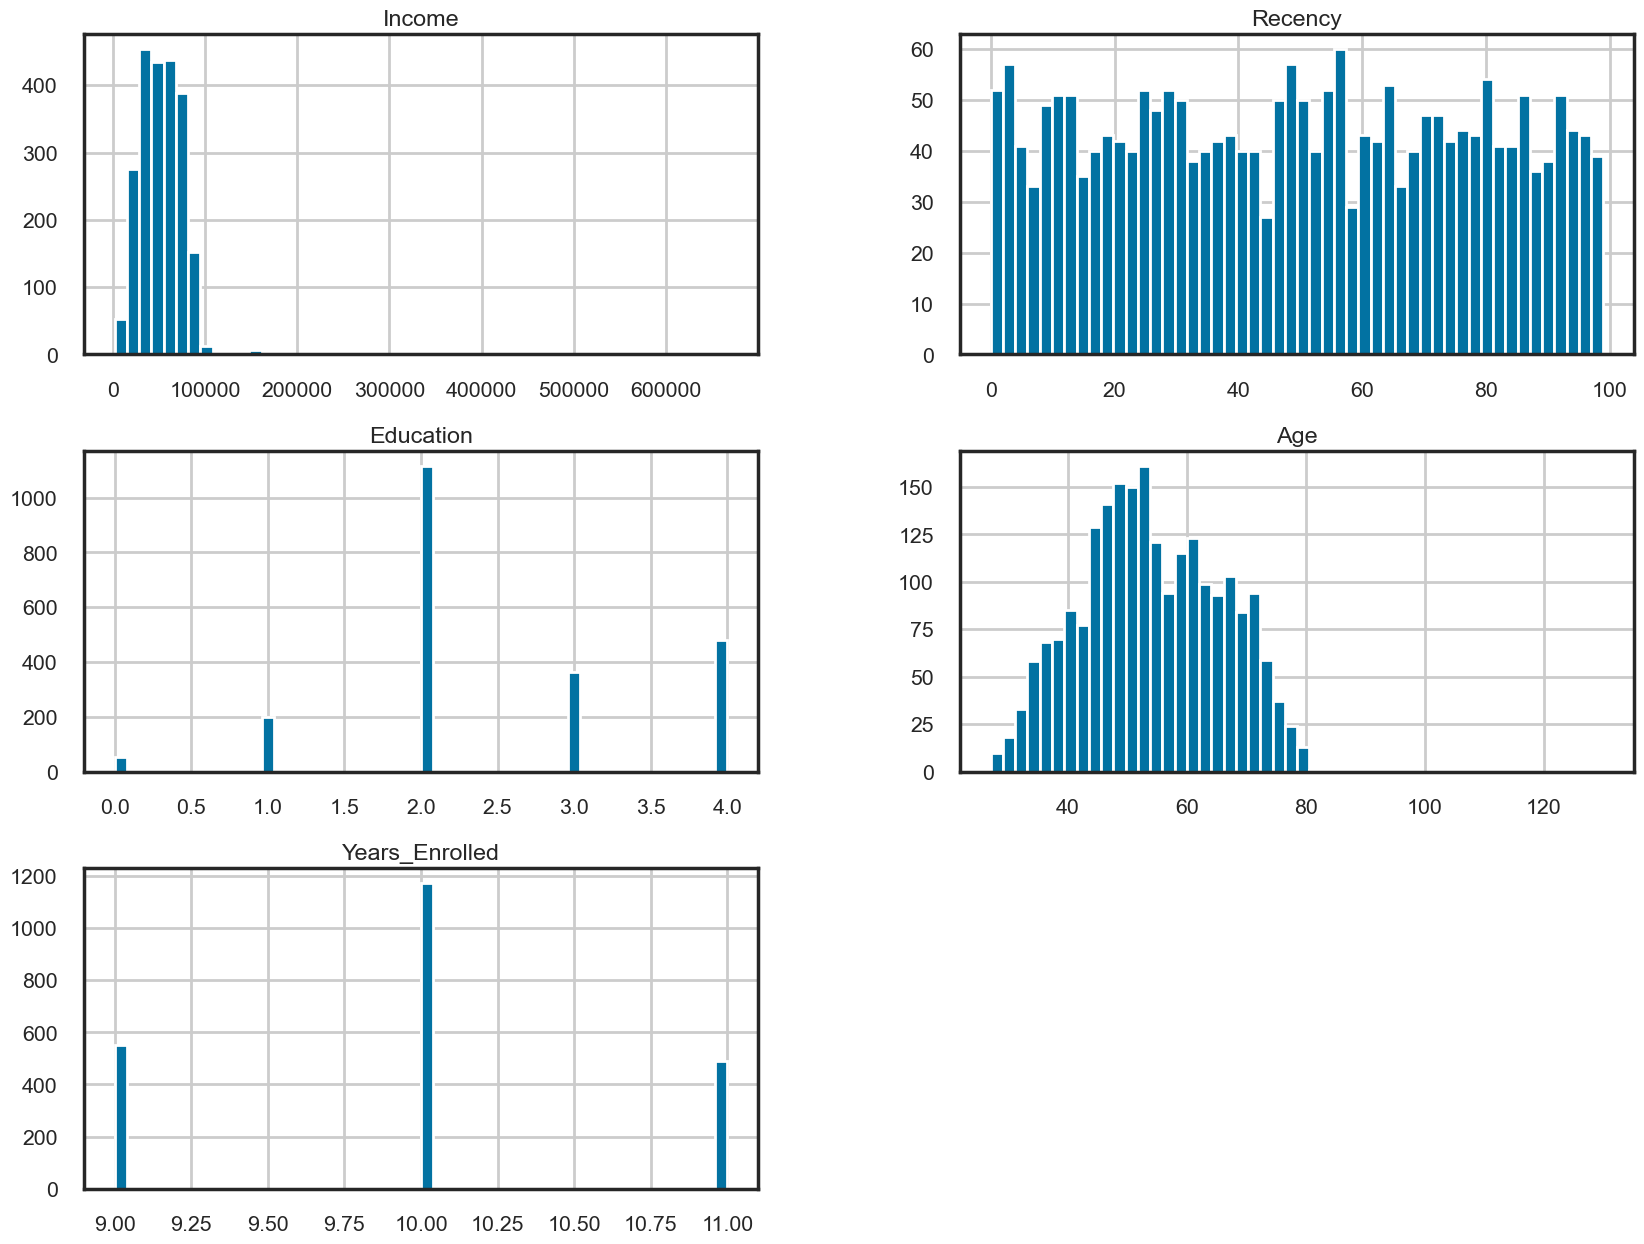

In [15]:
data_nullvals_eliminated.hist(column=["Income", "Recency", "Education", "Age", "Years_Enrolled"], bins=50, figsize=(20,15))
plt.show()

In [16]:
fig, axs = plt.subplots(1, 6, figsize=(11, 3))
a=sns.histplot(data=data_nullvals_eliminated,x='MntWines',ax=axs[0])
a=sns.histplot(data=data_nullvals_eliminated,x='MntFruits',ax=axs[1])
a=sns.histplot(data=data_nullvals_eliminated,x='MntMeatProducts',ax=axs[2])
a=sns.histplot(data=data_nullvals_eliminated,x='MntFishProducts',ax=axs[3])
a=sns.histplot(data=data_nullvals_eliminated,x='MntSweetProducts',ax=axs[4])
a=sns.histplot(data=data_nullvals_eliminated,x='MntGoldProds',ax=axs[5])

plt.subplots_adjust(bottom=0.1,top=0.9,hspace=0.4,left=0)

[2012 2014 2013]


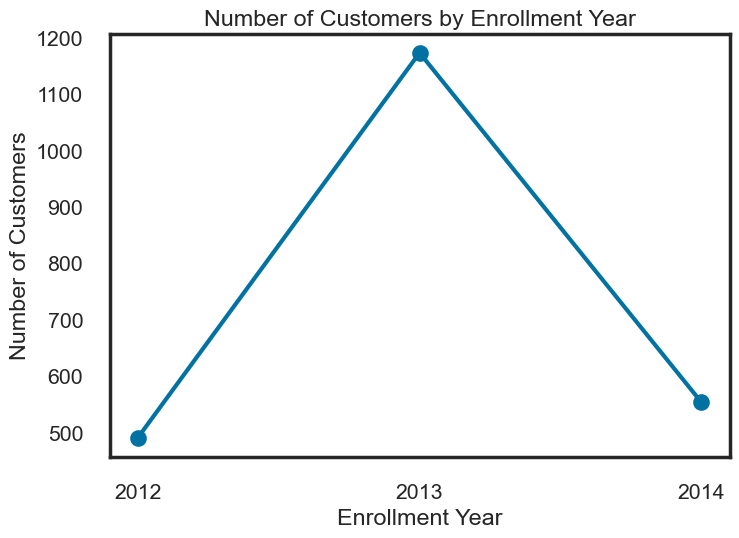

In [17]:
print(data_nullvals_eliminated["Enrollment_Start"].unique())
data_nullvals_eliminated["Enrollment_Start"].value_counts()

enrollment_years = data_nullvals_eliminated["Enrollment_Start"].value_counts().sort_index()
years = enrollment_years.index
customer_counts = enrollment_years.values

plt.plot(range(len(years)), customer_counts, marker='o')
plt.xticks(range(len(years)), years)  
plt.xlabel("Enrollment Year")
plt.ylabel("Number of Customers")
plt.title("Number of Customers by Enrollment Year")
plt.show()

## Sales Charts

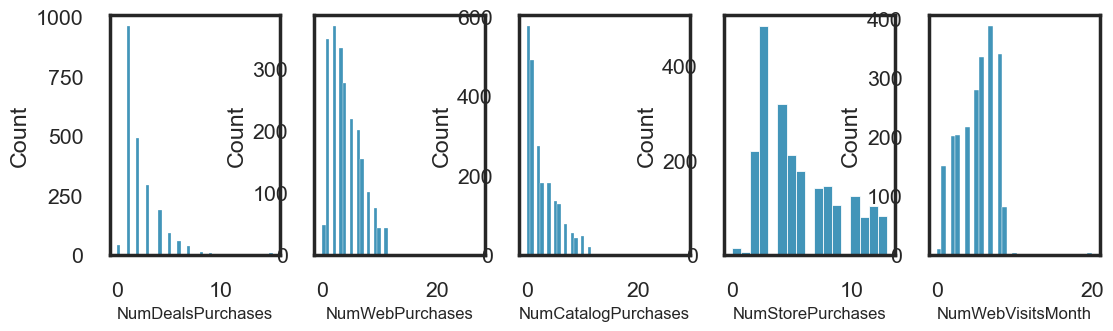

In [18]:
fig, axs = plt.subplots(1, 5, figsize=(11, 3))
a = sns.histplot(data=data_nullvals_eliminated, x='NumDealsPurchases', ax=axs[0])
a = sns.histplot(data=data_nullvals_eliminated, x='NumWebPurchases', ax=axs[1])
a = sns.histplot(data=data_nullvals_eliminated, x='NumCatalogPurchases', ax=axs[2])
a = sns.histplot(data=data_nullvals_eliminated, x='NumStorePurchases', ax=axs[3])
a = sns.histplot(data=data_nullvals_eliminated, x='NumWebVisitsMonth', ax=axs[4])

for ax in axs:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)  
plt.subplots_adjust(bottom=0.2, top=1, hspace=0.4, left=0)
plt.show()

## Campaign Acceptance

In [19]:
columns_to_filter = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]
campaign_acceptance = data_nullvals_eliminated[columns_to_filter]
acceptance_count = campaign_acceptance.sum()

plt.figure(figsize=(10, 6))
plt.bar(acceptance_count.index, acceptance_count.values)
plt.xlabel('Campaigns')
plt.ylabel('Acceptance Count')
plt.title('Campaign Acceptance Count')
plt.show()

## Search for common ground among customers with complaints

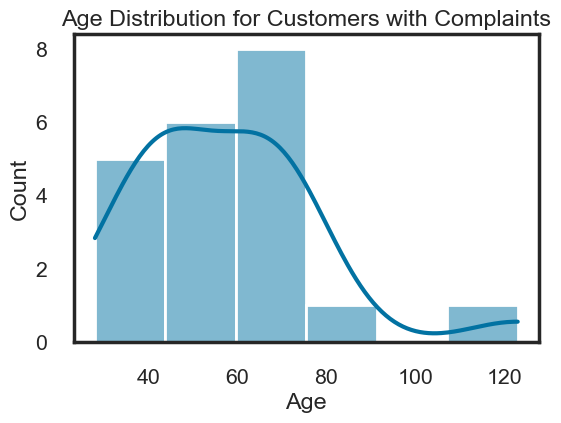

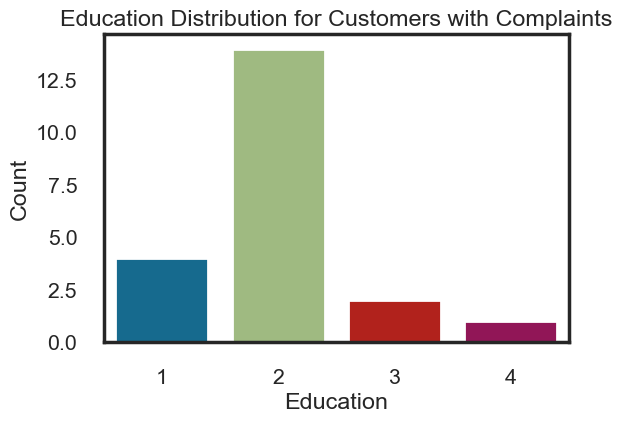

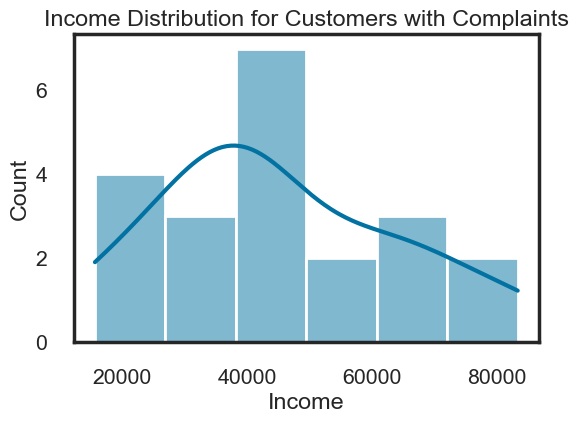

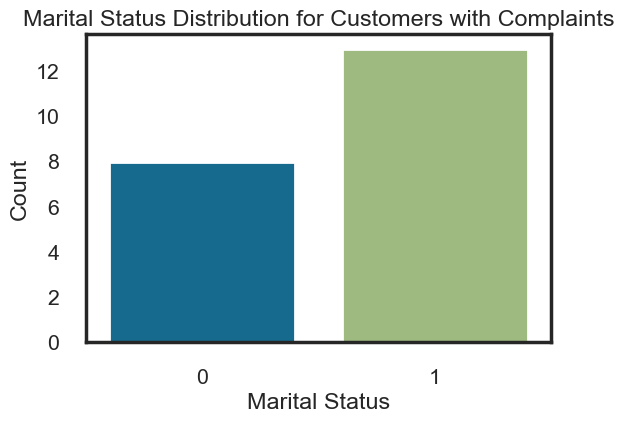

In [20]:
complaint_customers = data_nullvals_eliminated[data_nullvals_eliminated['Complain'] == 1]

plt.figure(figsize=(6, 4))
sns.histplot(complaint_customers['Age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution for Customers with Complaints')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Education', data=complaint_customers)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution for Customers with Complaints')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(complaint_customers['Income'], kde=True)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution for Customers with Complaints')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Has_Partner', data=complaint_customers)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution for Customers with Complaints')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(complaint_customers['Years_Enrolled'], kde=True)
plt.xlabel('Years Enrolled')
plt.ylabel('Count')
plt.title('Years Enrolled Distribution for Customers with Complaints')
plt.show()

### Heatmap

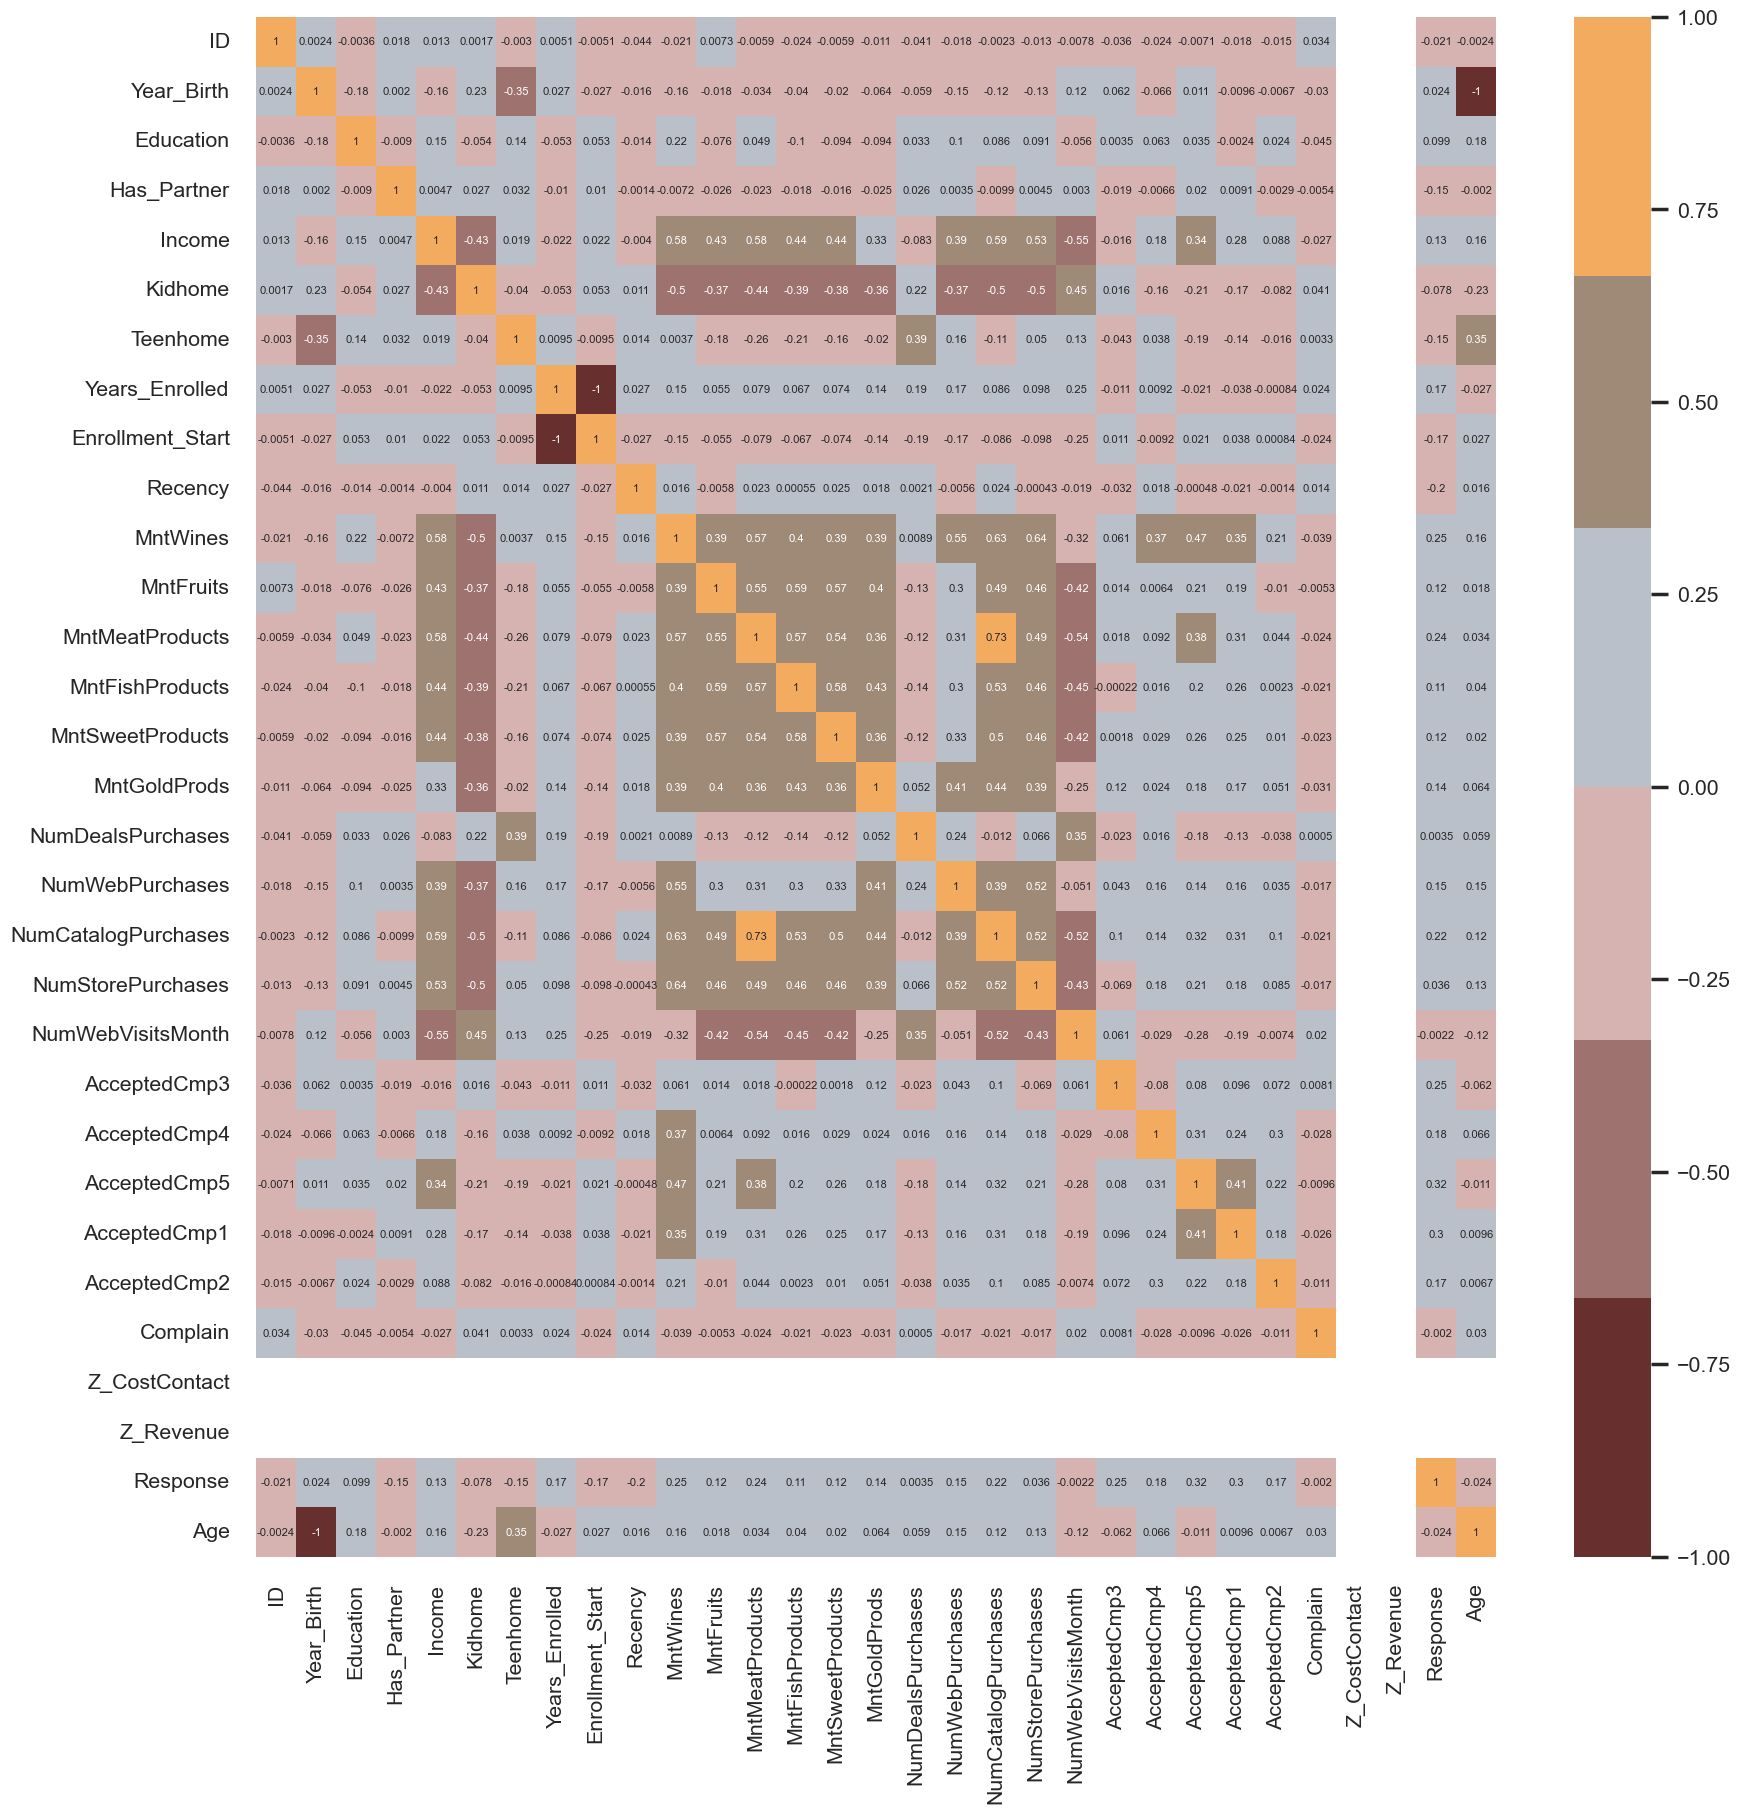

In [21]:
corrmat = data_nullvals_eliminated.corr()
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
plt.figure(figsize=(20, 20))  
annot_kws = {'size': 8}
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0, annot_kws=annot_kws)
plt.show()

# Feature Extraction and Feature Elimination

### Adding Total_Children, Total_Spent, Num_Total_Purchases, Enrollment_Time features

In [22]:
data_nullvals_eliminated['Total_Children']=data_nullvals_eliminated['Kidhome'] + data_nullvals_eliminated['Teenhome']
data_nullvals_eliminated['Total_Spent']=data_nullvals_eliminated['MntWines'] + data_nullvals_eliminated['MntFruits'] + data_nullvals_eliminated['MntMeatProducts'] + data_nullvals_eliminated['MntFishProducts'] + data_nullvals_eliminated['MntSweetProducts'] + data_nullvals_eliminated['MntGoldProds']
data_nullvals_eliminated['Num_Total_Purchases'] = data_nullvals_eliminated['NumWebPurchases'] + data_nullvals_eliminated['NumCatalogPurchases'] + data_nullvals_eliminated['NumStorePurchases'] + data_nullvals_eliminated['NumDealsPurchases']

data_nullvals_eliminated['Enrollment_Time'] = current_year - data_nullvals_eliminated['Enrollment_Start']
def calculate_family_size(row):
    if row['Has_Partner'] == 0:
        return 1 + int(row['Total_Children'])
    elif row['Has_Partner'] == 1:
        return 2 + int(row['Total_Children'])

to_drop=['Year_Birth','ID','Enrollment_Start','Z_CostContact','Z_Revenue']
data_nullvals_eliminated.drop(to_drop,inplace=True,axis=1)
data_nullvals_eliminated['Family_Size'] = data_nullvals_eliminated.apply(calculate_family_size, axis=1)
data_nullvals_eliminated

Education  Has_Partner   Income  Kidhome  Teenhome  Years_Enrolled  \
0             2            0  58138.0        0         0              11   
1             2            0  46344.0        1         1               9   
2             2            1  71613.0        0         0              10   
3             2            1  26646.0        1         0               9   
4             4            1  58293.0        1         0               9   
...         ...          ...      ...      ...       ...             ...   
2211          2            1  61223.0        0         1              10   
2212          4            1  64014.0        2         1               9   
2213          2            0  56981.0        0         0               9   
2214          3            1  69245.0        0         1               9   
2215          4            1  52869.0        1         1              11   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp1  \
0          58       635         88              546  ...             0   
1          38        11          1                6  ...             0   
2          26       426         49              127  ...             0   
3          26        11          4               20  ...             0   
4          94       173         43              118  ...             0   
...       ...       ...        ...              ...  ...           ...   
2211       46       709         43              182  ...             0   
2212       56       406          0               30  ...             1   
2213       91       908         48              217  ...             0   
2214        8       428         30              214  ...             0   
2215       40        84          3               61  ...             0   

      AcceptedCmp2  Complain  Response  Age  Total_Children  Total_Spent  \
0                0         0         1   66               0         1617   
1                0         0         0   69               2           27   
2                0         0         0   58               0          776   
3                0         0         0   39               1           53   
4                0         0         0   42               1          422   
...            ...       ...       ...  ...             ...          ...   
2211             0         0         0   56               1         1341   
2212             0         0         0   77               3          444   
2213             0         0         0   42               0         1241   
2214             0         0         0   67               1          843   
2215             0         0         1   69               2          172   

      Num_Total_Purchases  Enrollment_Time  Family_Size  
0                      25               11            1  
1                       6                9            3  
2                      21               10            2  
3                       8                9            3  
4                      19                9            3  
...                   ...              ...          ...  
2211                   18               10            3  
2212                   22                9            5  
2213                   19                9            1  
2214                   23                9            3  
2215                   11               11            4  

[2216 rows x 31 columns]

# Outlier Detection and Elimination

In [23]:
fig,ax=plt.subplots(figsize=(12,8))
plt.tight_layout(pad=6.0)

sns.histplot(data_nullvals_eliminated['Income'], color=palette[11], kde=True, bins='auto', alpha=1, fill=True, edgecolor=palette[12])
ax.lines[0].set_color(palette[12])
ax.set_title('\nIncome Distribution', fontsize=25)
ax.set_xlabel('Income\n', fontsize=20)
ax.set_ylabel('Total')
sns.despine(left=True, bottom=True)
plt.show()

In [24]:
fig,ax=plt.subplots(figsize=(12,8))
plt.tight_layout(pad=6.0)

sns.histplot(data_nullvals_eliminated['Age'], color=palette[1], kde=True, bins='auto', alpha=1, fill=True, edgecolor=palette[12])
ax.lines[0].set_color(palette[12])
ax.set_title('\nAge Distribution', fontsize=25)
ax.set_xlabel('Age\n', fontsize=20)
ax.set_ylabel('Total')
sns.despine(left=True, bottom=True)
plt.show()

In [25]:
data_nullvals_eliminated=data_nullvals_eliminated[(data_nullvals_eliminated['Age']<90)]
count_greater_than_150k = data_nullvals_eliminated[data_nullvals_eliminated['Income'] > 150000].shape[0]
print(count_greater_than_150k)
data_nullvals_eliminated=data_nullvals_eliminated[(data_nullvals_eliminated['Income']<150000)]
data_nullvals_eliminated

8


Education  Has_Partner   Income  Kidhome  Teenhome  Years_Enrolled  \
0             2            0  58138.0        0         0              11   
1             2            0  46344.0        1         1               9   
2             2            1  71613.0        0         0              10   
3             2            1  26646.0        1         0               9   
4             4            1  58293.0        1         0               9   
...         ...          ...      ...      ...       ...             ...   
2211          2            1  61223.0        0         1              10   
2212          4            1  64014.0        2         1               9   
2213          2            0  56981.0        0         0               9   
2214          3            1  69245.0        0         1               9   
2215          4            1  52869.0        1         1              11   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp1  \
0          58       635         88              546  ...             0   
1          38        11          1                6  ...             0   
2          26       426         49              127  ...             0   
3          26        11          4               20  ...             0   
4          94       173         43              118  ...             0   
...       ...       ...        ...              ...  ...           ...   
2211       46       709         43              182  ...             0   
2212       56       406          0               30  ...             1   
2213       91       908         48              217  ...             0   
2214        8       428         30              214  ...             0   
2215       40        84          3               61  ...             0   

      AcceptedCmp2  Complain  Response  Age  Total_Children  Total_Spent  \
0                0         0         1   66               0         1617   
1                0         0         0   69               2           27   
2                0         0         0   58               0          776   
3                0         0         0   39               1           53   
4                0         0         0   42               1          422   
...            ...       ...       ...  ...             ...          ...   
2211             0         0         0   56               1         1341   
2212             0         0         0   77               3          444   
2213             0         0         0   42               0         1241   
2214             0         0         0   67               1          843   
2215             0         0         1   69               2          172   

      Num_Total_Purchases  Enrollment_Time  Family_Size  
0                      25               11            1  
1                       6                9            3  
2                      21               10            2  
3                       8                9            3  
4                      19                9            3  
...                   ...              ...          ...  
2211                   18               10            3  
2212                   22                9            5  
2213                   19                9            1  
2214                   23                9            3  
2215                   11               11            4  

[2205 rows x 31 columns]

# Distributions of newly created features

In [26]:
fig,ax=plt.subplots(figsize=(12,8))
plt.tight_layout(pad=6.0)

sns.histplot(data_nullvals_eliminated['Total_Spent'], color=palette[2], kde=True, bins='auto', alpha=1, fill=True, edgecolor=palette[12])
ax.lines[0].set_color(palette[12])
ax.set_title('\nSpent Distribution', fontsize=25)
ax.set_xlabel('Spent\n', fontsize=20)
ax.set_ylabel('Total')
sns.despine(left=True, bottom=True)
plt.show()

In [27]:
fig,ax=plt.subplots(figsize=(12,8))
plt.tight_layout(pad=6.0)

sns.histplot(data_nullvals_eliminated['Family_Size'], color=palette[3], kde=True, bins='auto', alpha=1, fill=True, edgecolor=palette[12])
ax.lines[0].set_color(palette[12])
ax.set_title('\n Family Size Distribution', fontsize=25)
ax.set_xlabel('Family Size\n', fontsize=20)
ax.set_ylabel('Total')
sns.despine(left=True, bottom=True)
plt.show()

# Standardization

In [28]:
data_scaled = data_nullvals_eliminated.copy()
scaler=StandardScaler()
scaler.fit(data_scaled)
scaled_ds=pd.DataFrame(scaler.transform(data_scaled),columns=data_scaled.columns)
scaled_ds

Education  Has_Partner    Income   Kidhome  Teenhome  Years_Enrolled  \
0     -0.456565    -1.347625  0.314651 -0.823405 -0.930767        1.498307   
1     -0.456565    -1.347625 -0.254877  1.038757  0.906602       -1.417639   
2     -0.456565     0.742046  0.965354 -0.823405 -0.930767        0.040334   
3     -0.456565     0.742046 -1.206087  1.038757 -0.930767       -1.417639   
4      1.536950     0.742046  0.322136  1.038757 -0.930767       -1.417639   
...         ...          ...       ...       ...       ...             ...   
2200  -0.456565     0.742046  0.463624 -0.823405  0.906602        0.040334   
2201   1.536950     0.742046  0.598401  2.900920  0.906602       -1.417639   
2202  -0.456565    -1.347625  0.258780 -0.823405 -0.930767       -1.417639   
2203   0.540193     0.742046  0.851004 -0.823405  0.906602       -1.417639   
2204   1.536950     0.742046  0.060213  1.038757  0.906602        1.498307   

       Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp1  \
0     0.310830  0.974566   1.548614         1.748400  ...     -0.262358   
1    -0.380600 -0.874776  -0.638664        -0.731678  ...     -0.262358   
2    -0.795458  0.355155   0.568110        -0.175957  ...     -0.262358   
3    -0.795458 -0.874776  -0.563241        -0.667380  ...     -0.262358   
4     1.555404 -0.394659   0.417263        -0.217292  ...     -0.262358   
...        ...       ...        ...              ...  ...           ...   
2200 -0.104028  1.193879   0.417263         0.076644  ...     -0.262358   
2201  0.241687  0.295881  -0.663806        -0.621452  ...      3.811584   
2202  1.451690  1.783653   0.542969         0.237389  ...     -0.262358   
2203 -1.417746  0.361082   0.090428         0.223611  ...     -0.262358   
2204 -0.311457 -0.658427  -0.588382        -0.479078  ...     -0.262358   

      AcceptedCmp2  Complain  Response       Age  Total_Children  Total_Spent  \
0        -0.117444 -0.095673  2.370996  1.017189       -1.266589     1.679323   
1        -0.117444 -0.095673 -0.421764  1.273530        1.403420    -0.963897   
2        -0.117444 -0.095673 -0.421764  0.333612       -1.266589     0.281242   
3        -0.117444 -0.095673 -0.421764 -1.289883        0.068415    -0.920675   
4        -0.117444 -0.095673 -0.421764 -1.033542        0.068415    -0.307248   
...            ...       ...       ...       ...             ...          ...   
2200     -0.117444 -0.095673 -0.421764  0.162718        0.068415     1.220500   
2201     -0.117444 -0.095673 -0.421764  1.957107        2.738424    -0.270675   
2202     -0.117444 -0.095673 -0.421764 -1.033542       -1.266589     1.054260   
2203     -0.117444 -0.095673 -0.421764  1.102636        0.068415     0.392623   
2204     -0.117444 -0.095673  2.370996  1.273530        1.403420    -0.722849   

      Num_Total_Purchases  Enrollment_Time  Family_Size  
0                1.328161         1.498307    -1.759012  
1               -1.167390        -1.417639     0.448513  
2                0.802782         0.040334    -0.655250  
3               -0.904700        -1.417639     0.448513  
4                0.540092        -1.417639     0.448513  
...                   ...              ...          ...  
2200             0.408747         0.040334     0.448513  
2201             0.934126        -1.417639     2.656038  
2202             0.540092        -1.417639    -1.759012  
2203             1.065471        -1.417639     0.448513  
2204            -0.510666         1.498307     1.552276  

[2205 rows x 31 columns]

# Dimensionality Reduction with PCA

In [29]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2205.0 -1.127846e-16  3.009084 -5.550283 -2.721154 -0.715377  2.505398   
col2  2205.0  3.866899e-17  1.755209 -3.975539 -1.354148 -0.254323  1.179748   
col3  2205.0 -5.639228e-18  1.505744 -3.847199 -0.958216 -0.094118  1.022454   

           max  
col1  8.603371  
col2  6.219494  
col3  5.334470

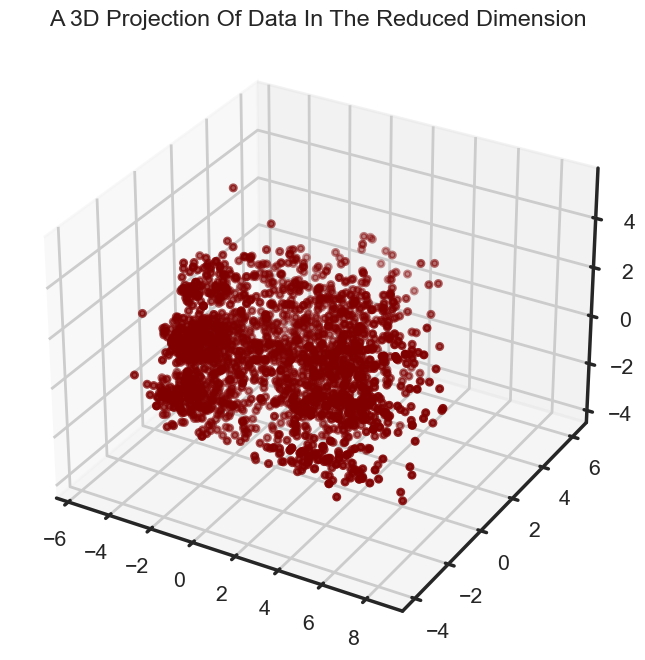

In [30]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Determining the ideal number of segments with the Elbow method

In [31]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

# Clustering with K-Means Algorithm

In [32]:
kmeans = KMeans(n_clusters = 4)
data_nullvals_eliminated_kmeans = data_nullvals_eliminated.copy()
PCA_ds_kmeans = PCA_ds.copy()
yhat_kmeans = kmeans.fit_predict(PCA_ds_kmeans)
PCA_ds_kmeans['Clusters'] = yhat_kmeans
data_nullvals_eliminated_kmeans['Clusters'] = yhat_kmeans
data_nullvals_eliminated_kmeans

Education  Has_Partner   Income  Kidhome  Teenhome  Years_Enrolled  \
0             2            0  58138.0        0         0              11   
1             2            0  46344.0        1         1               9   
2             2            1  71613.0        0         0              10   
3             2            1  26646.0        1         0               9   
4             4            1  58293.0        1         0               9   
...         ...          ...      ...      ...       ...             ...   
2211          2            1  61223.0        0         1              10   
2212          4            1  64014.0        2         1               9   
2213          2            0  56981.0        0         0               9   
2214          3            1  69245.0        0         1               9   
2215          4            1  52869.0        1         1              11   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp2  \
0          58       635         88              546  ...             0   
1          38        11          1                6  ...             0   
2          26       426         49              127  ...             0   
3          26        11          4               20  ...             0   
4          94       173         43              118  ...             0   
...       ...       ...        ...              ...  ...           ...   
2211       46       709         43              182  ...             0   
2212       56       406          0               30  ...             0   
2213       91       908         48              217  ...             0   
2214        8       428         30              214  ...             0   
2215       40        84          3               61  ...             0   

      Complain  Response  Age  Total_Children  Total_Spent  \
0            0         1   66               0         1617   
1            0         0   69               2           27   
2            0         0   58               0          776   
3            0         0   39               1           53   
4            0         0   42               1          422   
...        ...       ...  ...             ...          ...   
2211         0         0   56               1         1341   
2212         0         0   77               3          444   
2213         0         0   42               0         1241   
2214         0         0   67               1          843   
2215         0         1   69               2          172   

      Num_Total_Purchases  Enrollment_Time  Family_Size  Clusters  
0                      25               11            1         3  
1                       6                9            3         0  
2                      21               10            2         3  
3                       8                9            3         1  
4                      19                9            3         0  
...                   ...              ...          ...       ...  
2211                   18               10            3         2  
2212                   22                9            5         0  
2213                   19                9            1         3  
2214                   23                9            3         2  
2215                   11               11            4         0  

[2205 rows x 32 columns]

# Visualization of clusters in 3d space K-Means

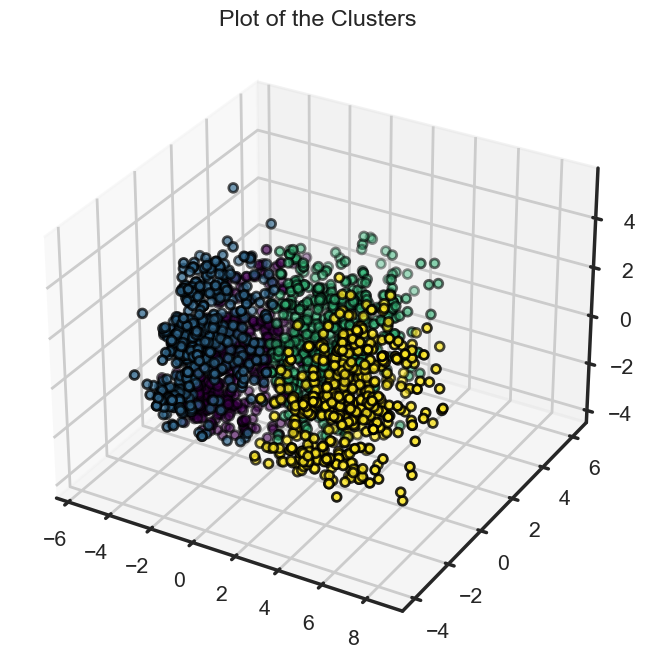

In [33]:
fig=plt.figure(figsize=(12,8))
ax=plt.subplot(111, projection='3d')
ax.scatter(x,y,z, s=40, c=PCA_ds_kmeans['Clusters'], marker='o', edgecolor='black', cmap='viridis')
ax.set_title('Plot of the Clusters')
plt.show()

# Distributions of clusters K-Means

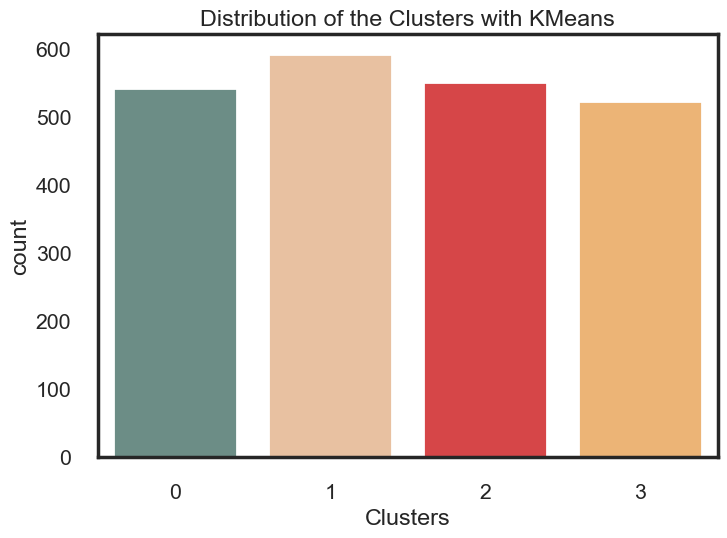

In [34]:
sns.countplot(x=data_nullvals_eliminated_kmeans['Clusters'],palette=palette[1:5])
plt.title('Distribution of the Clusters with KMeans')
plt.show()

In [35]:
print(data_nullvals_eliminated_kmeans['Clusters'].value_counts().to_frame().std())
data_nullvals_eliminated_kmeans['Clusters'].value_counts().to_frame().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

count    29.567719
dtype: float64


# Clustering with Agglomerative Clustering Algorithm

In [36]:
AC = AgglomerativeClustering(n_clusters=4)
PCA_ds_AC = PCA_ds.copy()
data_nullvals_eliminated_AC = data_nullvals_eliminated.copy()
yhat_AC = AC.fit_predict(PCA_ds_AC)
PCA_ds_AC['Clusters'] = yhat_AC
data_nullvals_eliminated_AC['Clusters'] = yhat_AC
data_nullvals_eliminated_AC

Education  Has_Partner   Income  Kidhome  Teenhome  Years_Enrolled  \
0             2            0  58138.0        0         0              11   
1             2            0  46344.0        1         1               9   
2             2            1  71613.0        0         0              10   
3             2            1  26646.0        1         0               9   
4             4            1  58293.0        1         0               9   
...         ...          ...      ...      ...       ...             ...   
2211          2            1  61223.0        0         1              10   
2212          4            1  64014.0        2         1               9   
2213          2            0  56981.0        0         0               9   
2214          3            1  69245.0        0         1               9   
2215          4            1  52869.0        1         1              11   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp2  \
0          58       635         88              546  ...             0   
1          38        11          1                6  ...             0   
2          26       426         49              127  ...             0   
3          26        11          4               20  ...             0   
4          94       173         43              118  ...             0   
...       ...       ...        ...              ...  ...           ...   
2211       46       709         43              182  ...             0   
2212       56       406          0               30  ...             0   
2213       91       908         48              217  ...             0   
2214        8       428         30              214  ...             0   
2215       40        84          3               61  ...             0   

      Complain  Response  Age  Total_Children  Total_Spent  \
0            0         1   66               0         1617   
1            0         0   69               2           27   
2            0         0   58               0          776   
3            0         0   39               1           53   
4            0         0   42               1          422   
...        ...       ...  ...             ...          ...   
2211         0         0   56               1         1341   
2212         0         0   77               3          444   
2213         0         0   42               0         1241   
2214         0         0   67               1          843   
2215         0         1   69               2          172   

      Num_Total_Purchases  Enrollment_Time  Family_Size  Clusters  
0                      25               11            1         1  
1                       6                9            3         3  
2                      21               10            2         1  
3                       8                9            3         0  
4                      19                9            3         2  
...                   ...              ...          ...       ...  
2211                   18               10            3         2  
2212                   22                9            5         3  
2213                   19                9            1         1  
2214                   23                9            3         2  
2215                   11               11            4         3  

[2205 rows x 32 columns]

# Visualization of clusters in 3d space AC

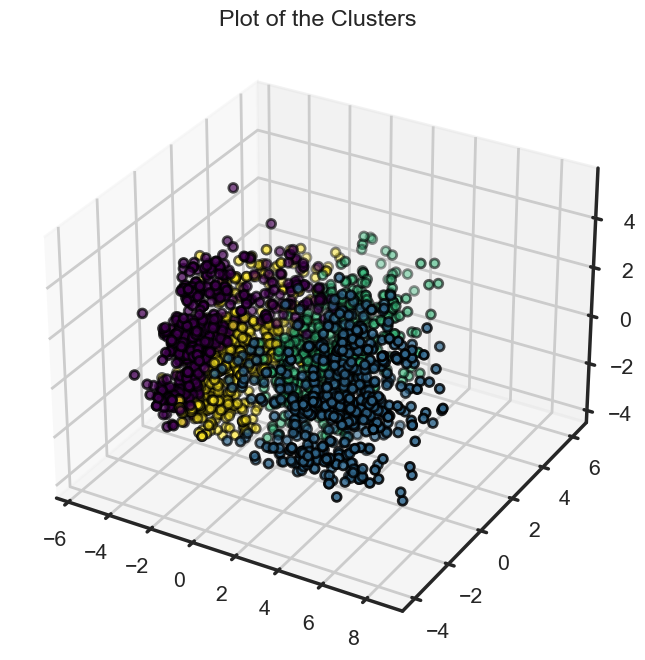

In [37]:
fig=plt.figure(figsize=(12,8))
ax=plt.subplot(111, projection='3d')
ax.scatter(x,y,z, s=40, c=PCA_ds_AC['Clusters'], marker='o', edgecolor='black', cmap='viridis')
ax.set_title('Plot of the Clusters')
plt.show()

# Distributions of clusters AC

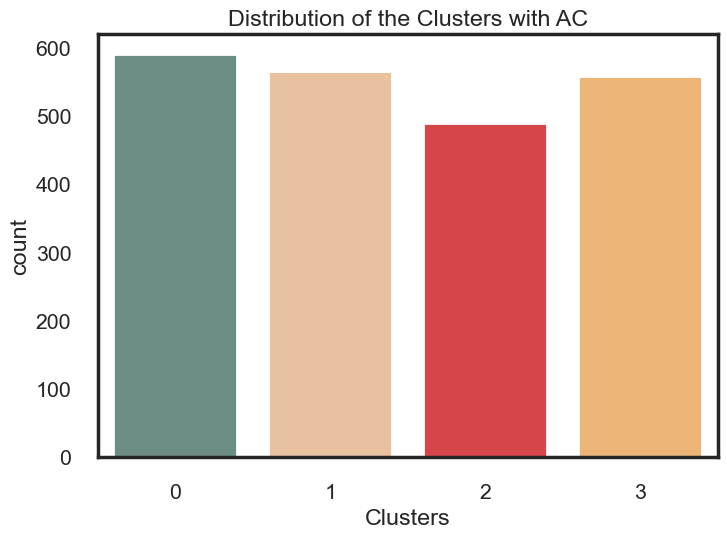

In [38]:
sns.countplot(x=data_nullvals_eliminated_AC['Clusters'],palette=palette[1:5])
plt.title('Distribution of the Clusters with AC')
plt.show()

In [39]:
print(data_nullvals_eliminated_AC['Clusters'].value_counts().to_frame().std())
data_nullvals_eliminated_AC['Clusters'].value_counts().to_frame().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

count    43.130616
dtype: float64


# Clustering with Affinity Propagation Algorithm

In [40]:
AP = AffinityPropagation(damping=0.9)
PCA_ds_AP = PCA_ds.copy()
data_nullvals_eliminated_AP = data_nullvals_eliminated.copy()
AP_df = AP.fit_predict(PCA_ds_AP)
PCA_ds_AP["Clusters"] = AP_df
data_nullvals_eliminated_AP["Clusters"] = AP_df

# Visualization of clusters in 3d space  AP

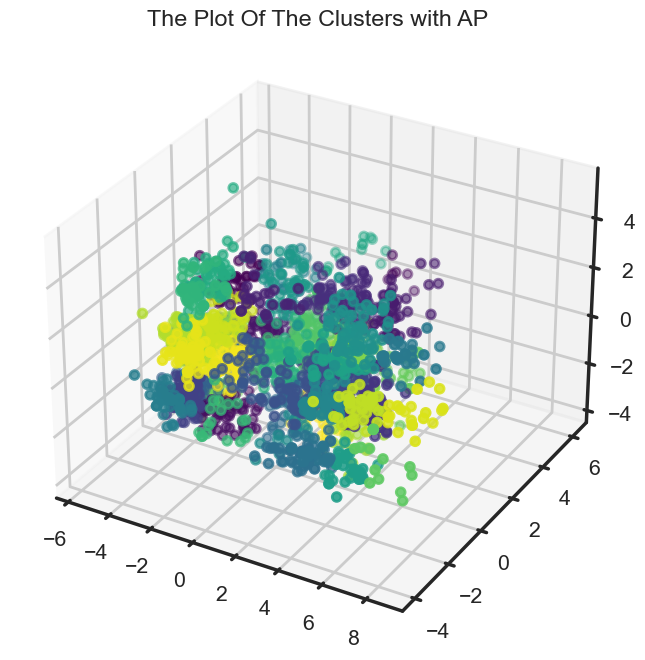

In [41]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds_AP["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters with AP")
plt.show()

# Distributions of clusters AP

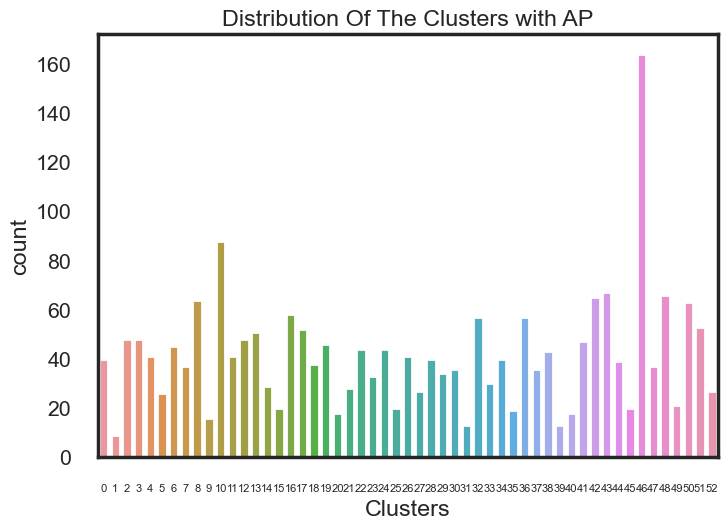

In [42]:
pl = sns.countplot(x=data_nullvals_eliminated_AP["Clusters"])
pl.set_title("Distribution Of The Clusters with AP")
plt.xticks(fontsize=8)
plt.show()

In [43]:
print(data_nullvals_eliminated_AP['Clusters'].value_counts().to_frame().std())
data_nullvals_eliminated_AP['Clusters'].value_counts().to_frame().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

count    23.76353
dtype: float64


# Clustering with BIRCH Algorithm

In [44]:
BP = Birch(threshold=0.01, n_clusters=4)
PCA_ds_BP = PCA_ds.copy()
data_nullvals_eliminated_BP = data_nullvals_eliminated.copy()
BP_df = BP.fit_predict(PCA_ds_BP)
PCA_ds_BP["Clusters"] = BP_df
data_nullvals_eliminated_BP["Clusters"]= BP_df

# Visualization of clusters in 3d space BIRCH

In [45]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds_BP["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters with BIRCH")
plt.show()

# Distributions of clusters BIRCH

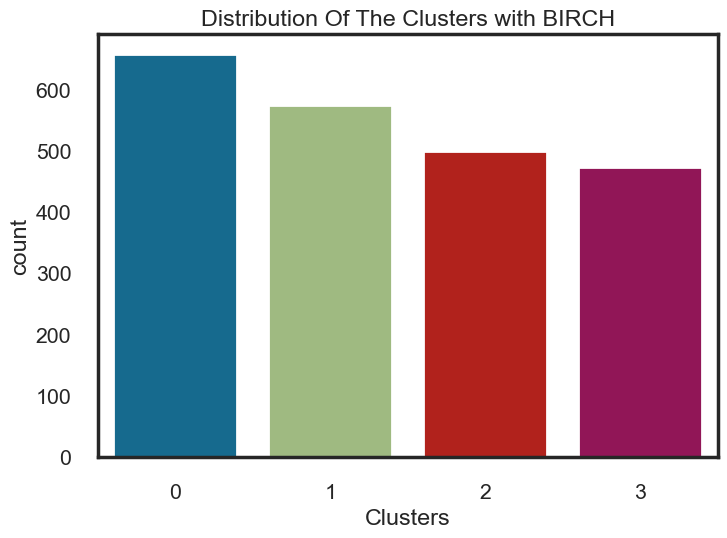

In [46]:
pl = sns.countplot(x=data_nullvals_eliminated_BP["Clusters"])
pl.set_title("Distribution Of The Clusters with BIRCH")
plt.show()

In [47]:
print(data_nullvals_eliminated_BP['Clusters'].value_counts().to_frame().std())
data_nullvals_eliminated_BP['Clusters'].value_counts().to_frame().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

count    82.886971
dtype: float64


# Clustering with DBSCAN Algorithm

In [48]:
DP = DBSCAN(eps=0.30, min_samples=9)
PCA_ds_DP = PCA_ds.copy()
data_nullvals_eliminated_DP = data_nullvals_eliminated.copy()
DP_df = DP.fit_predict(PCA_ds_DP)
PCA_ds_DP["Clusters"] = DP_df
data_nullvals_eliminated_DP["Clusters"]= DP_df

# Visualization of clusters in 3d space  DBSCAN

In [49]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds_DP["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters with DBSCAN")
plt.show()

# Distributions of clusters DBSCAN

In [50]:
pl = sns.countplot(x=data_nullvals_eliminated_DP["Clusters"])
pl.set_title("Distribution Of The Clusters with DBSCAN")
plt.show()

In [51]:
print(data_nullvals_eliminated_DP['Clusters'].value_counts().to_frame().std())
data_nullvals_eliminated_DP['Clusters'].value_counts().to_frame().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

count    646.632817
dtype: float64


# Clustering with Mini-Batch K-Means Algorithm

In [52]:
MP = MiniBatchKMeans(n_clusters=4)
PCA_ds_MP = PCA_ds.copy()
data_nullvals_eliminated_MP = data_nullvals_eliminated.copy()
MP_df = MP.fit_predict(PCA_ds_MP)
PCA_ds_MP["Clusters"] = MP_df
data_nullvals_eliminated_MP["Clusters"]= MP_df

# Visualization of clusters in 3d space Mini-Batch K-Means

In [53]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds_MP["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters with Mini-Batch K-Means")
plt.show()

# Distributions of clusters Mini-Batch K-Means

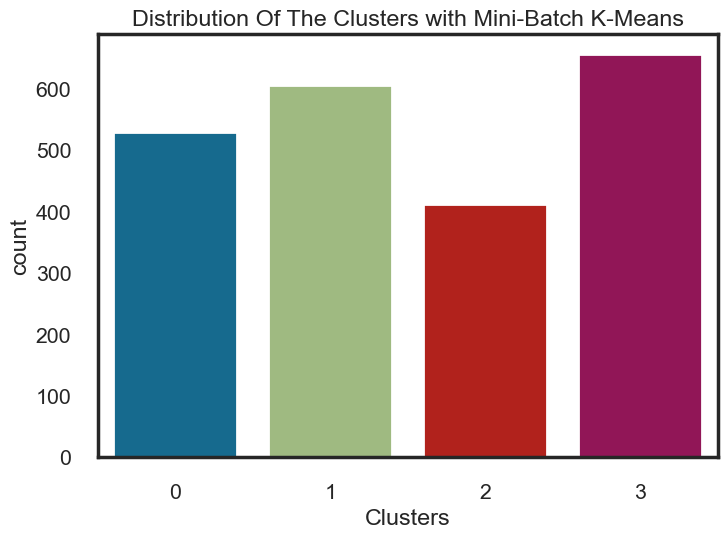

In [54]:
pl = sns.countplot(x=data_nullvals_eliminated_MP["Clusters"])
pl.set_title("Distribution Of The Clusters with Mini-Batch K-Means")
plt.show()

In [55]:
print(data_nullvals_eliminated_MP['Clusters'].value_counts().to_frame().std())
data_nullvals_eliminated_MP['Clusters'].value_counts().to_frame().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

count    106.126889
dtype: float64


# Clustering with Mean Shift algorithm

In [56]:
MSP = MeanShift()
PCA_ds_MSP = PCA_ds.copy()
data_nullvals_eliminated_MSP = data_nullvals_eliminated.copy()
MSP_df = MSP.fit_predict(PCA_ds_MSP)
PCA_ds_MSP["Clusters"] = MSP_df
data_nullvals_eliminated_MSP["Clusters"]= MSP_df

# Visualization of clusters in 3d space Mean Shift

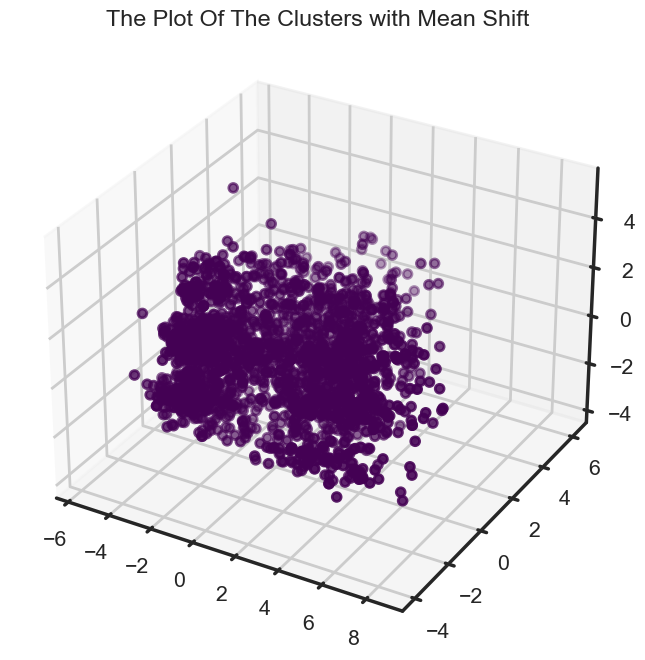

In [57]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds_MSP["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters with Mean Shift")
plt.show()

# Distributions of clusters Mean Shift

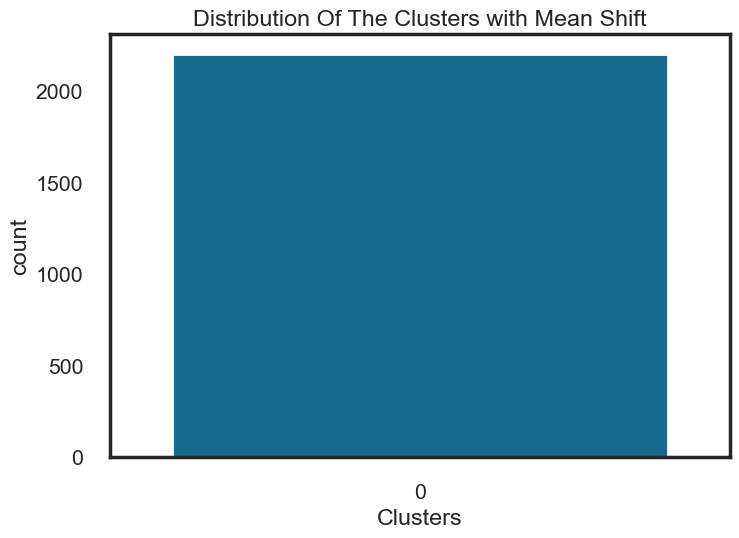

In [58]:
pl = sns.countplot(x=data_nullvals_eliminated_MSP["Clusters"])
pl.set_title("Distribution Of The Clusters with Mean Shift")
plt.show()

In [59]:
data_nullvals_eliminated_MSP['Clusters'].value_counts().to_frame().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

# Clustering with OPTICS Algorithm

In [60]:
OP = OPTICS(eps=0.8, min_samples=10)
PCA_ds_OP = PCA_ds.copy()
data_nullvals_eliminated_OP = data_nullvals_eliminated.copy()
OP_df = OP.fit_predict(PCA_ds_OP)
PCA_ds_OP["Clusters"] = OP_df
data_nullvals_eliminated_OP["Clusters"]= OP_df

# Visualization of clusters in 3d space OPTICS

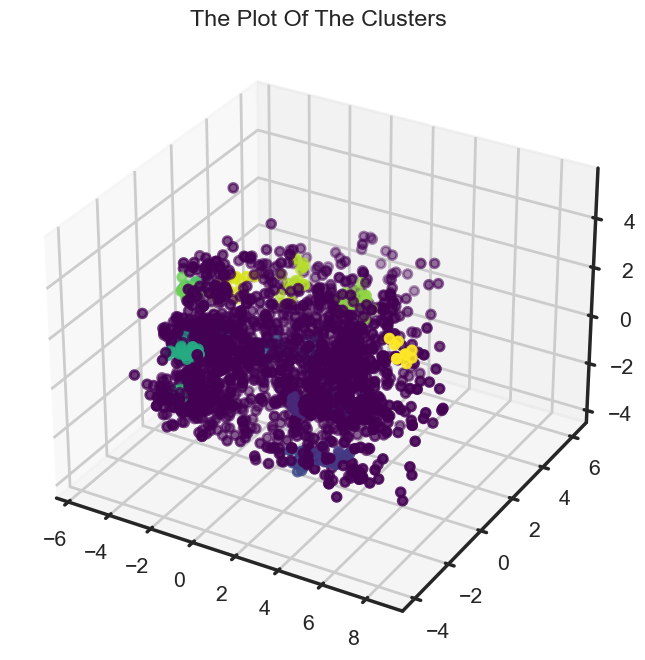

In [61]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds_OP["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

# Distributions of clusters OPTICS

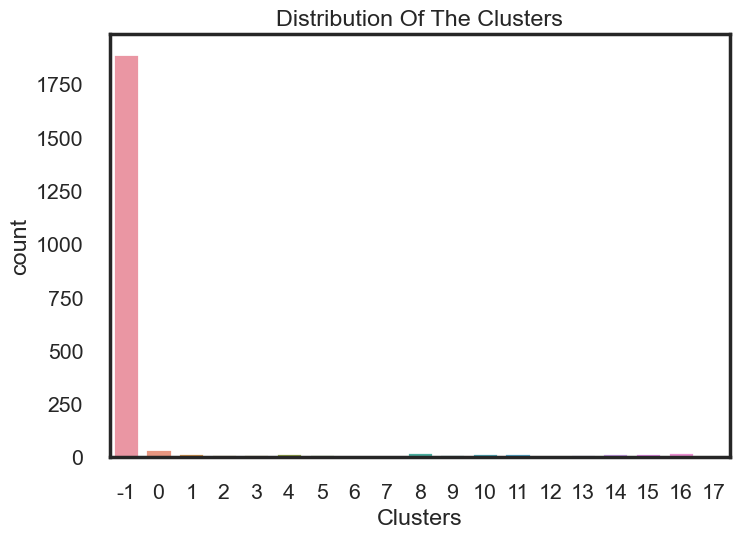

In [62]:
pl = sns.countplot(x=data_nullvals_eliminated_OP["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [63]:
print(data_nullvals_eliminated_OP['Clusters'].value_counts().to_frame().std())
data_nullvals_eliminated_OP['Clusters'].value_counts().to_frame().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

count    430.358697
dtype: float64


# Clustering with GaussianMixture Algorithm

In [64]:
GP = GaussianMixture(n_components=4)
PCA_ds_GP = PCA_ds.copy()
data_nullvals_eliminated_GP = data_nullvals_eliminated.copy()
GP_df = GP.fit_predict(PCA_ds_GP)
PCA_ds_GP["Clusters"] = GP_df
data_nullvals_eliminated_GP["Clusters"]= GP_df

# Visualization of clusters in 3d space GaussianMixture

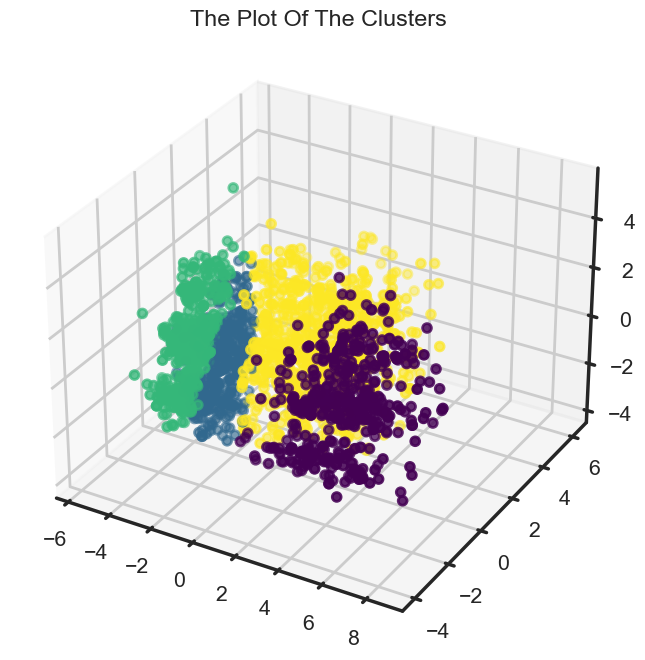

In [65]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds_GP["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

# Distributions of clusters GaussianMixture

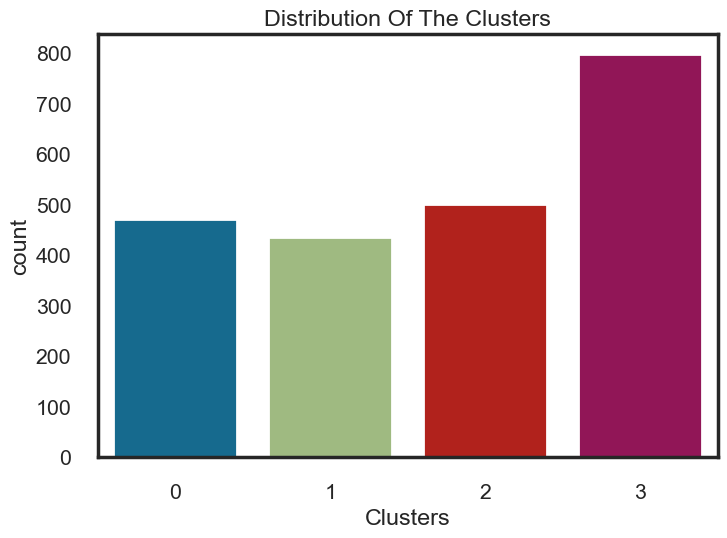

In [66]:
pl = sns.countplot(x=data_nullvals_eliminated_GP["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [67]:
print(data_nullvals_eliminated_GP['Clusters'].value_counts().to_frame().std())
data_nullvals_eliminated_GP['Clusters'].value_counts().to_frame().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

count    166.69808
dtype: float64


# Clustering with K-Means++ Algorithm

In [68]:
kplus = KMeans(n_clusters=4, init='k-means++', n_init=10)
PCA_ds_kplus = PCA_ds.copy()
data_nullvals_eliminated_kplus = data_nullvals_eliminated.copy()
new_data_cluster_assignments = kplus.fit_predict(PCA_ds_kplus)
PCA_ds_kplus["Clusters"] = new_data_cluster_assignments
data_nullvals_eliminated_kplus["Clusters"]= new_data_cluster_assignments
data_nullvals_eliminated_kplus

Education  Has_Partner   Income  Kidhome  Teenhome  Years_Enrolled  \
0             2            0  58138.0        0         0              11   
1             2            0  46344.0        1         1               9   
2             2            1  71613.0        0         0              10   
3             2            1  26646.0        1         0               9   
4             4            1  58293.0        1         0               9   
...         ...          ...      ...      ...       ...             ...   
2211          2            1  61223.0        0         1              10   
2212          4            1  64014.0        2         1               9   
2213          2            0  56981.0        0         0               9   
2214          3            1  69245.0        0         1               9   
2215          4            1  52869.0        1         1              11   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp2  \
0          58       635         88              546  ...             0   
1          38        11          1                6  ...             0   
2          26       426         49              127  ...             0   
3          26        11          4               20  ...             0   
4          94       173         43              118  ...             0   
...       ...       ...        ...              ...  ...           ...   
2211       46       709         43              182  ...             0   
2212       56       406          0               30  ...             0   
2213       91       908         48              217  ...             0   
2214        8       428         30              214  ...             0   
2215       40        84          3               61  ...             0   

      Complain  Response  Age  Total_Children  Total_Spent  \
0            0         1   66               0         1617   
1            0         0   69               2           27   
2            0         0   58               0          776   
3            0         0   39               1           53   
4            0         0   42               1          422   
...        ...       ...  ...             ...          ...   
2211         0         0   56               1         1341   
2212         0         0   77               3          444   
2213         0         0   42               0         1241   
2214         0         0   67               1          843   
2215         0         1   69               2          172   

      Num_Total_Purchases  Enrollment_Time  Family_Size  Clusters  
0                      25               11            1         1  
1                       6                9            3         0  
2                      21               10            2         1  
3                       8                9            3         3  
4                      19                9            3         0  
...                   ...              ...          ...       ...  
2211                   18               10            3         2  
2212                   22                9            5         0  
2213                   19                9            1         1  
2214                   23                9            3         2  
2215                   11               11            4         0  

[2205 rows x 32 columns]

# Visualization of clusters in 3d space K-Means++

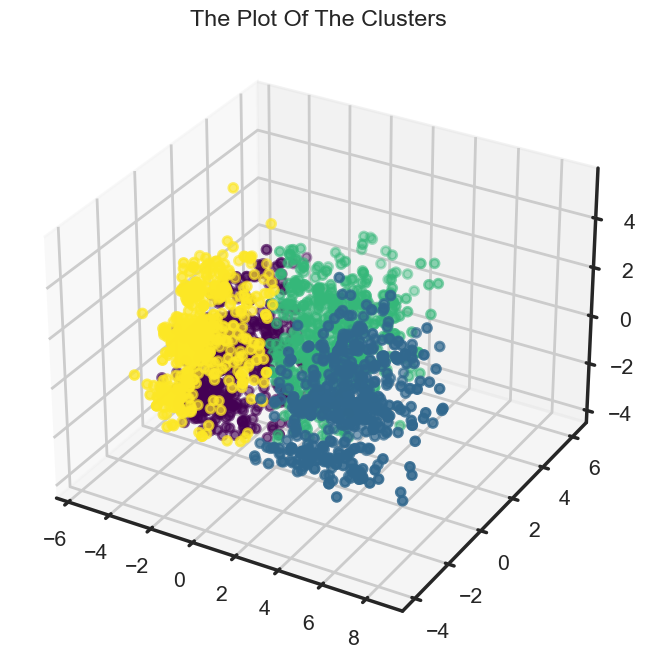

In [69]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds_kplus["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

# Distributions of clusters K-Means++

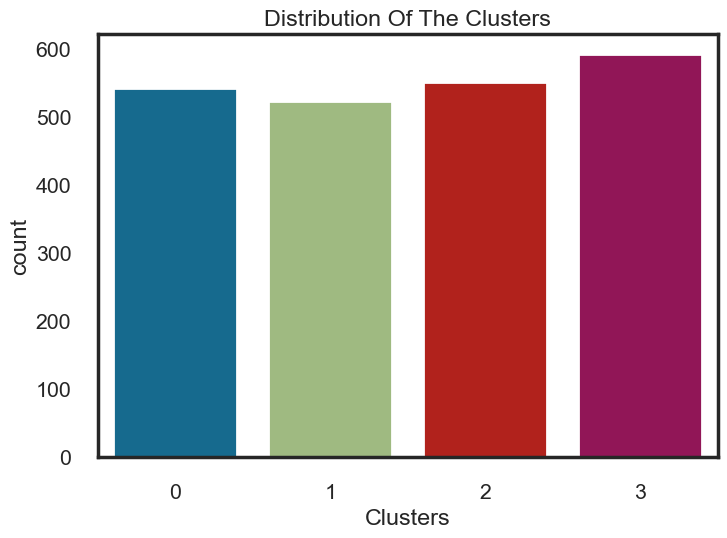

In [70]:
pl = sns.countplot(x=data_nullvals_eliminated_kplus["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [71]:
print(data_nullvals_eliminated_kplus['Clusters'].value_counts().to_frame().std())
data_nullvals_eliminated_kplus['Clusters'].value_counts().to_frame().T.style.set_properties(**{'background-color':'#2a9d8f', 'color':'white', 'border':'2.5px solid black'})

count    29.567719
dtype: float64


### Performance Comparison Between Most Balanced Discrimination Algorithms (K-Means, K-Means++, AC, BIRCH, Mini-Batch K-Means, Gaussian Mixture)

# K-Means

In [72]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
silhouette_scores0 = []
davies_bouldin_scores0 = []
calinski_harabasz_scores0 = []

for train_idx, test_idx in kfold.split(PCA_ds_kmeans):
    X_train, X_test = PCA_ds_kmeans.iloc[train_idx], PCA_ds_kmeans.iloc[test_idx]
    kmeans.fit(X_train)
    labels_test = kmeans.predict(X_test)

    score = silhouette_score(X_test, labels_test)
    db_index = davies_bouldin_score(X_test, labels_test)
    ch_index = calinski_harabasz_score(X_test, labels_test)

    silhouette_scores0.append(score)
    davies_bouldin_scores0.append(db_index)
    calinski_harabasz_scores0.append(ch_index)

print("Silhouette Scores:", silhouette_scores0)
print("Average Silhouette Score:", np.mean(silhouette_scores0))
print()
print("davies_bouldin_score Scores:", davies_bouldin_scores0)
print("Average davies_bouldinScore:", np.mean(davies_bouldin_scores0))
print()
print("calinski_harabasz_score Scores:", calinski_harabasz_scores0)
print("Average calinski_harabasz Score:", np.mean(calinski_harabasz_scores0))

Silhouette Scores: [0.3553640879925864, 0.3529326552404248, 0.3748763020546854, 0.3545906310767368, 0.337170724624772]
Average Silhouette Score: 0.3549868801978411

davies_bouldin_score Scores: [1.0631234021691163, 1.0809041201655516, 1.0245456233058627, 1.0716255531235772, 1.1145622137926612]
Average davies_bouldinScore: 1.0709521825113537

calinski_harabasz_score Scores: [363.93888431395703, 357.8303090774074, 398.6068320548793, 371.919044892947, 355.03109323814664]
Average calinski_harabasz Score: 369.4652327154675


# K-Means++

In [73]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
silhouette_scores1 = []
davies_bouldin_scores1 = []
calinski_harabasz_scores1 = []

for train_idx, test_idx in kfold.split(PCA_ds_kplus):
    
    X_train, X_test = PCA_ds_kplus.iloc[train_idx], PCA_ds_kplus.iloc[test_idx]
    kplus.fit(X_train)
    labels_test = kplus.predict(X_test)

    score = silhouette_score(X_test, labels_test)
    db_index = davies_bouldin_score(X_test, labels_test)
    ch_index = calinski_harabasz_score(X_test, labels_test)

    silhouette_scores1.append(score)
    davies_bouldin_scores1.append(db_index)
    calinski_harabasz_scores1.append(ch_index)

print("Silhouette Scores:", silhouette_scores1)
print("Average Silhouette Score:", np.mean(silhouette_scores1))
print()
print("davies_bouldin_score Scores:", davies_bouldin_scores1)
print("Average davies_bouldinScore:", np.mean(davies_bouldin_scores1))
print()
print("calinski_harabasz_score Scores:", calinski_harabasz_scores1)
print("Average calinski_harabasz Score:", np.mean(calinski_harabasz_scores1))

Silhouette Scores: [0.41792821658214657, 0.41532499876695717, 0.43980900553637764, 0.41786095951953417, 0.4077231516096866]
Average Silhouette Score: 0.4197292664029404

davies_bouldin_score Scores: [0.9110450326295086, 0.9274049930669447, 0.8774258498464165, 0.9066064152225699, 0.9323336715580263]
Average davies_bouldinScore: 0.9109631924646932

calinski_harabasz_score Scores: [366.28632929284277, 361.38238141067, 404.4395769086473, 369.49162451843273, 355.1851642624515]
Average calinski_harabasz Score: 371.35701527860886


# Agglomerative Clustering (AC)

In [74]:
silhouette_scores2 = []
davies_bouldin_scores2 = []
calinski_harabasz_scores2 = []

for train_idx, test_idx in kfold.split(PCA_ds_AC):
    
    X_train, X_test = PCA_ds_AC.iloc[train_idx], PCA_ds_AC.iloc[test_idx]
    
    labels_test = AC.fit_predict(X_test)

    score = silhouette_score(X_test, labels_test)
    db_index = davies_bouldin_score(X_test, labels_test)
    ch_index = calinski_harabasz_score(X_test, labels_test)

    silhouette_scores2.append(score)
    davies_bouldin_scores2.append(db_index)
    calinski_harabasz_scores2.append(ch_index)

print("Silhouette Scores:", silhouette_scores2)
print("Average Silhouette Score:", np.mean(silhouette_scores2))
print()
print("Davies-Bouldin Scores:", davies_bouldin_scores2)
print("Average Davies-Bouldin Score:", np.mean(davies_bouldin_scores2))
print()
print("Calinski-Harabasz Scores:", calinski_harabasz_scores2)
print("Average Calinski-Harabasz Score:", np.mean(calinski_harabasz_scores2))

Silhouette Scores: [0.3582867620470639, 0.3655322694428048, 0.36555972446868834, 0.34982711355429136, 0.34309041899149256]
Average Silhouette Score: 0.35645925770086817

Davies-Bouldin Scores: [1.0400245063453462, 1.0258310236971295, 1.0794154732068801, 0.987265930112363, 1.0977123988425532]
Average Davies-Bouldin Score: 1.0460498664408544

Calinski-Harabasz Scores: [311.8317759334452, 312.7064114551375, 321.56390905869665, 303.58766763179665, 289.668346761021]
Average Calinski-Harabasz Score: 307.87162216801937


# BIRCH

In [75]:
silhouette_scores3 = []
davies_bouldin_scores3 = []
calinski_harabasz_scores3 = []

for train_idx, test_idx in kfold.split(PCA_ds_BP):
    
    X_train, X_test = PCA_ds_BP.iloc[train_idx], PCA_ds_BP.iloc[test_idx]
    
    BP.fit(X_train)
    labels_test = BP.predict(X_test)

    score = silhouette_score(X_test, labels_test)
    db_index = davies_bouldin_score(X_test, labels_test)
    ch_index = calinski_harabasz_score(X_test, labels_test)

    silhouette_scores3.append(score)
    davies_bouldin_scores3.append(db_index)
    calinski_harabasz_scores3.append(ch_index)

print("Silhouette Scores:", silhouette_scores3)
print("Average Silhouette Score:", np.mean(silhouette_scores3))
print()
print("davies_bouldin_score Scores:", davies_bouldin_scores3)
print("Average davies_bouldinScore:", np.mean(davies_bouldin_scores3))
print()
print("calinski_harabasz_score Scores:", calinski_harabasz_scores3)
print("Average calinski_harabasz Score:", np.mean(calinski_harabasz_scores3))

Silhouette Scores: [0.328479600134133, 0.31644634434471336, 0.3095411568897422, 0.31694162191348957, 0.3096546521018071]
Average Silhouette Score: 0.31621267507677703

davies_bouldin_score Scores: [1.1480916193675346, 1.2148776480953156, 1.2322743615547056, 1.186605147948271, 1.2151480532817436]
Average davies_bouldinScore: 1.1993993660495141

calinski_harabasz_score Scores: [327.34176149222174, 316.0867583784948, 332.7799060095414, 313.11433205182334, 317.85045615096215]
Average calinski_harabasz Score: 321.4346428166087


# Mini-Batch K-Means

In [76]:
silhouette_scores4 = []
davies_bouldin_scores4 = []
calinski_harabasz_scores4 = []

for train_idx, test_idx in kfold.split(PCA_ds_MP):
    
    X_train, X_test = PCA_ds_MP.iloc[train_idx], PCA_ds_MP.iloc[test_idx]
    
    MP.fit(X_train)
    labels_test = MP.predict(X_test)

    score = silhouette_score(X_test, labels_test)
    db_index = davies_bouldin_score(X_test, labels_test)
    ch_index = calinski_harabasz_score(X_test, labels_test)

    silhouette_scores4.append(score)
    davies_bouldin_scores4.append(db_index)
    calinski_harabasz_scores4.append(ch_index)

print("Silhouette Scores:", silhouette_scores4)
print("Average Silhouette Score:", np.mean(silhouette_scores4))
print()
print("davies_bouldin_score Scores:", davies_bouldin_scores4)
print("Average davies_bouldinScore:", np.mean(davies_bouldin_scores4))
print()
print("calinski_harabasz_score Scores:", calinski_harabasz_scores4)
print("Average calinski_harabasz Score:", np.mean(calinski_harabasz_scores4))

Silhouette Scores: [0.34391324655792616, 0.3578590745629822, 0.3305310450310179, 0.3490788762683885, 0.3237702850848167]
Average Silhouette Score: 0.3410305055010263

davies_bouldin_score Scores: [1.071020083326462, 1.125023572645212, 1.3208338328636628, 1.0603008867131614, 1.1268794082476137]
Average davies_bouldinScore: 1.1408115567592223

calinski_harabasz_score Scores: [359.0169902302872, 318.13713140597366, 329.86369823343244, 368.67915136477694, 347.1012166870302]
Average calinski_harabasz Score: 344.5596375843001


# Gaussian Mixture

In [77]:
silhouette_scores5 = []
davies_bouldin_scores5 = []
calinski_harabasz_scores5 = []

for train_idx, test_idx in kfold.split(PCA_ds_GP):
    
    X_train, X_test = PCA_ds_GP.iloc[train_idx], PCA_ds_GP.iloc[test_idx]
    
    GP.fit(X_train)
    labels_test = GP.predict(X_test)

    score = silhouette_score(X_test, labels_test)
    db_index = davies_bouldin_score(X_test, labels_test)
    ch_index = calinski_harabasz_score(X_test, labels_test)

    silhouette_scores5.append(score)
    davies_bouldin_scores5.append(db_index)
    calinski_harabasz_scores5.append(ch_index)

print("Silhouette Scores:", silhouette_scores5)
print("Average Silhouette Score:", np.mean(silhouette_scores5))
print()
print("davies_bouldin_score Scores:", davies_bouldin_scores5)
print("Average davies_bouldinScore:", np.mean(davies_bouldin_scores5))
print()
print("calinski_harabasz_score Scores:", calinski_harabasz_scores5)
print("Average calinski_harabasz Score:", np.mean(calinski_harabasz_scores5))

Silhouette Scores: [0.36223487280223504, 0.3311259774797135, 0.3784869440505286, 0.33428786914608016, 0.3344736783004872]
Average Silhouette Score: 0.3481218683558089

davies_bouldin_score Scores: [1.02285275978185, 1.1233634623356348, 1.0319029743483004, 1.2195763562419746, 1.2054329090471643]
Average davies_bouldinScore: 1.1206256923509847

calinski_harabasz_score Scores: [335.3106723388537, 302.7174960012473, 297.6666315668088, 280.9224895732941, 283.3860333974813]
Average calinski_harabasz Score: 300.00066457553703


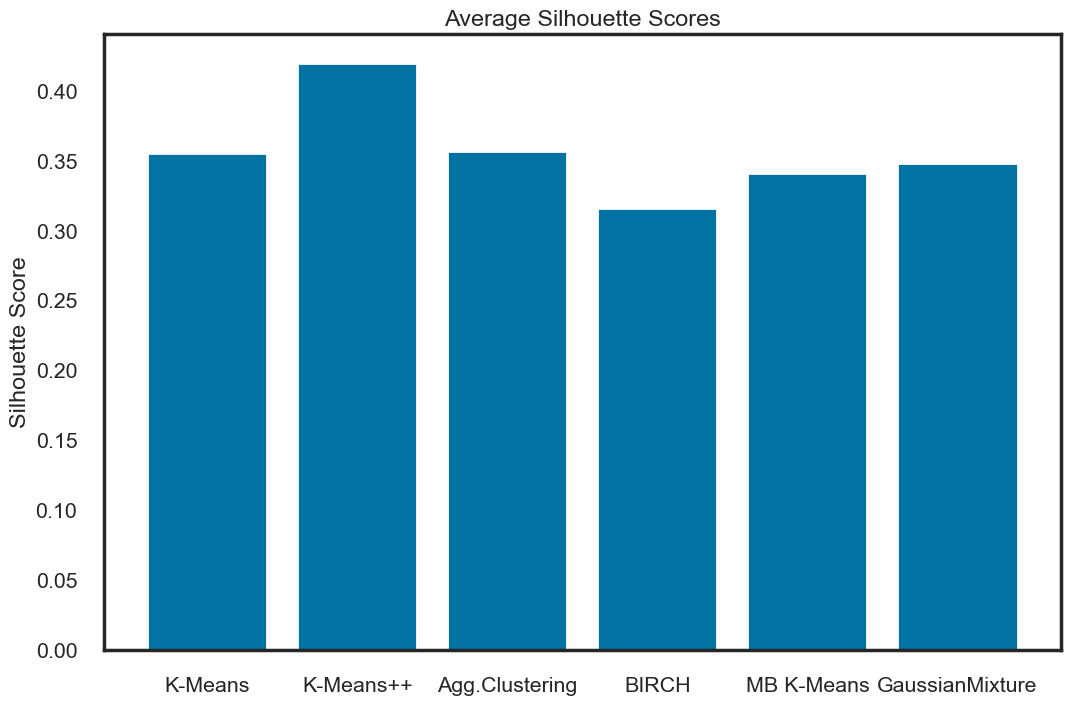

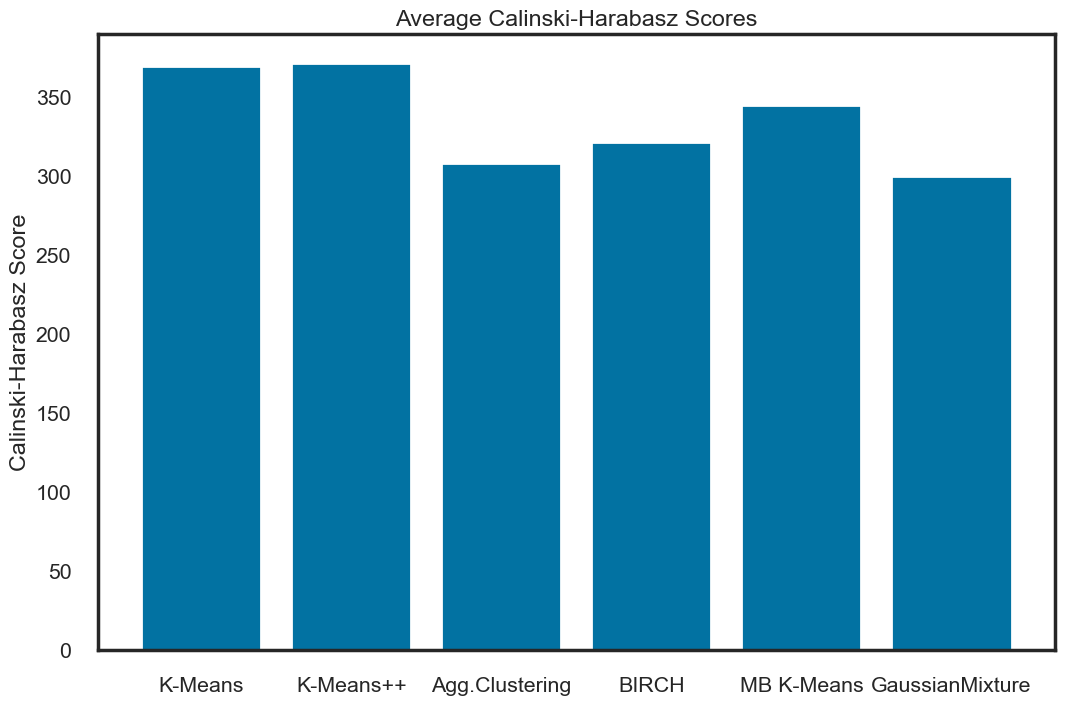

In [78]:
algorithm_names = ["K-Means","K-Means++", "Agg.Clustering", "BIRCH", "MB K-Means","GaussianMixture"]  

average_silhouette_scores = [np.mean(silhouette_scores0),np.mean(silhouette_scores1), np.mean(silhouette_scores2),np.mean(silhouette_scores3),np.mean(silhouette_scores4),np.mean(silhouette_scores5)]  
average_davies_bouldin_scores =[np.mean(davies_bouldin_scores0),np.mean(davies_bouldin_scores1), np.mean(davies_bouldin_scores2),np.mean(davies_bouldin_scores3),np.mean(davies_bouldin_scores4),np.mean(davies_bouldin_scores5)]  
average_calinski_harabasz_scores = [np.mean(calinski_harabasz_scores0),np.mean(calinski_harabasz_scores1), np.mean(calinski_harabasz_scores2),np.mean(calinski_harabasz_scores3),np.mean(calinski_harabasz_scores4),np.mean(calinski_harabasz_scores5)]  
plt.figure(figsize=(42, 8))

plt.subplot(1, 3, 1)
plt.bar(algorithm_names, average_silhouette_scores)
plt.title("Average Silhouette Scores")
plt.ylabel("Silhouette Score")

plt.show()
plt.figure(figsize=(42, 8))
plt.subplot(1, 3, 2)
plt.bar(algorithm_names, average_davies_bouldin_scores)
plt.title("Average Davies-Bouldin Scores")
plt.ylabel("Davies-Bouldin Score")

plt.show()
plt.figure(figsize=(42, 8))
plt.subplot(1, 3, 3)
plt.bar(algorithm_names, average_calinski_harabasz_scores)
plt.title("Average Calinski-Harabasz Scores")
plt.ylabel("Calinski-Harabasz Score")
plt.show()

# Hyperparameter Tuning for K-Means++

## Grid Search

In [79]:
X = data_nullvals_eliminated.copy()
param_grid = {'n_clusters': range(3, 11)} 

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

kmeans = KMeans(init='k-means++', random_state=42)
grid_search = GridSearchCV(kmeans, param_grid, scoring = make_scorer(silhouette_scorer), cv=5)
grid_search.fit(X)
best_k = grid_search.best_params_['n_clusters']
print("Best K (GridSearch):", best_k)

Best K (GridSearch): 3


## Genetic Algorithm

In [80]:
def objective(trial):
    k = trial.suggest_int("n_clusters", 3, 10)
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette = silhouette_score(X, labels)
    return silhouette

def main():
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50)  
    best_k = study.best_params["n_clusters"]
    print("Best K (Optuna):", best_k)

if __name__ == "__main__":
    main()

[I 2023-08-21 16:08:01,253] A new study created in memory with name: no-name-4032971d-0900-4a7a-b477-7198df7f49a9
[I 2023-08-21 16:08:01,395] Trial 0 finished with value: 0.535546418407372 and parameters: {'n_clusters': 5}. Best is trial 0 with value: 0.535546418407372.
[I 2023-08-21 16:08:01,513] Trial 1 finished with value: 0.5353075575040731 and parameters: {'n_clusters': 4}. Best is trial 0 with value: 0.535546418407372.
[I 2023-08-21 16:08:01,654] Trial 2 finished with value: 0.5160263376487966 and parameters: {'n_clusters': 9}. Best is trial 0 with value: 0.535546418407372.
[I 2023-08-21 16:08:01,778] Trial 3 finished with value: 0.535546418407372 and parameters: {'n_clusters': 5}. Best is trial 0 with value: 0.535546418407372.
[I 2023-08-21 16:08:01,903] Trial 4 finished with value: 0.535546418407372 and parameters: {'n_clusters': 5}. Best is trial 0 with value: 0.535546418407372.
[I 2023-08-21 16:08:02,035] Trial 5 finished with value: 0.5169034171466894 and parameters: {'n_clu

Best K (Optuna): 3


# Random Search

In [81]:
def objective(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette = silhouette_score(X, labels)
    return silhouette

def random_search(n_trials):
    best_score = -np.inf
    best_k = None

    for _ in range(n_trials):
        n_clusters = random.randint(3, 10)
        score = objective(n_clusters)

        if score > best_score:
            best_score = score
            best_k = n_clusters

    return best_k
def main():
    n_trials = 50  
    best_k = random_search(n_trials)
    print("Best K (Random Search):", best_k)

if __name__ == "__main__":
    main()

Best K (Random Search): 3


In [82]:
kplus = KMeans(n_clusters=3, init='k-means++', n_init=10)
PCA_ds_kplus = PCA_ds.copy()
data_nullvals_eliminated_kplus2 = data_nullvals_eliminated.copy()
new_data_cluster_assignments = kplus.fit_predict(PCA_ds_kplus)
PCA_ds_kplus["Clusters"] = new_data_cluster_assignments
data_nullvals_eliminated_kplus2["Clusters"]= new_data_cluster_assignments

In [83]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds_kplus["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

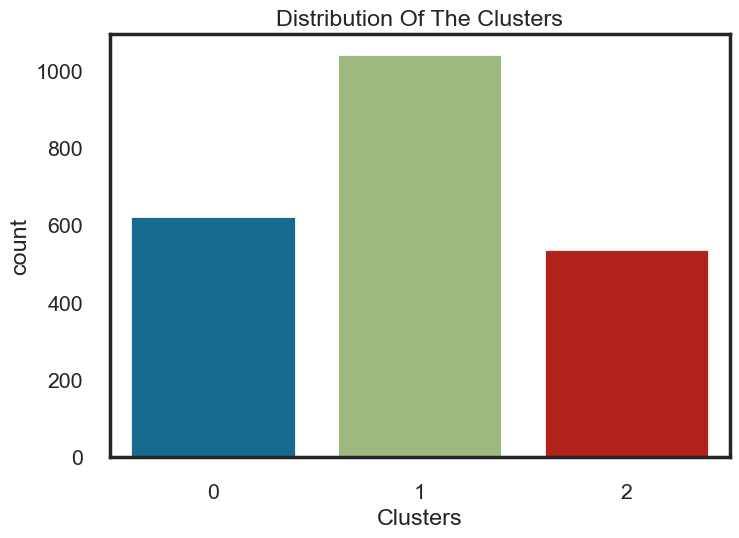

In [84]:
pl = sns.countplot(x=data_nullvals_eliminated_kplus2["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [85]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
silhouette_scoresopt = []
davies_bouldin_scoresopt = []
calinski_harabasz_scoresopt = []

for train_idx, test_idx in kfold.split(PCA_ds_kplus):
    
    X_train, X_test = PCA_ds_kplus.iloc[train_idx], PCA_ds_kplus.iloc[test_idx]
    kplus.fit(X_train)
    labels_test = kplus.predict(X_test)

    score = silhouette_score(X_test, labels_test)
    db_index = davies_bouldin_score(X_test, labels_test)
    ch_index = calinski_harabasz_score(X_test, labels_test)

    silhouette_scoresopt.append(score)
    davies_bouldin_scoresopt.append(db_index)
    calinski_harabasz_scoresopt.append(ch_index)

print("Silhouette Scores:", silhouette_scoresopt)
print("Average Silhouette Score:", np.mean(silhouette_scoresopt))
print()
print("davies_bouldin_score Scores:", davies_bouldin_scoresopt)
print("Average davies_bouldinScore:", np.mean(davies_bouldin_scoresopt))
print()
print("calinski_harabasz_score Scores:", calinski_harabasz_scoresopt)
print("Average calinski_harabasz Score:", np.mean(calinski_harabasz_scoresopt))

Silhouette Scores: [0.40639053454179275, 0.41331496386262234, 0.43123769606993356, 0.4071695929968231, 0.40359247679186855]
Average Silhouette Score: 0.412341052852608

davies_bouldin_score Scores: [0.9535626587817401, 0.9466421892302427, 0.9053287441435544, 0.9754037530544187, 0.9708187003947119]
Average davies_bouldinScore: 0.9503512091209336

calinski_harabasz_score Scores: [387.3843278923624, 394.81561564538896, 422.5415555490548, 397.7610471755106, 387.2627850914271]
Average calinski_harabasz Score: 397.95306627074876


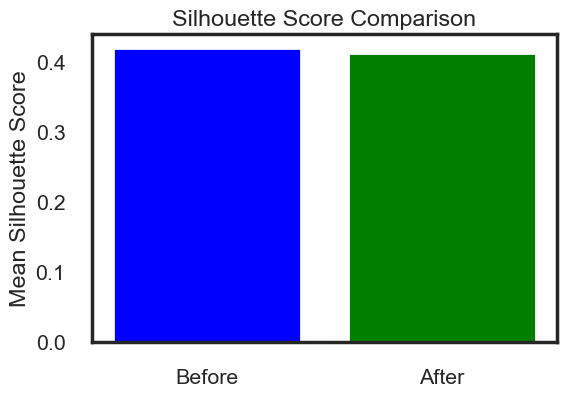

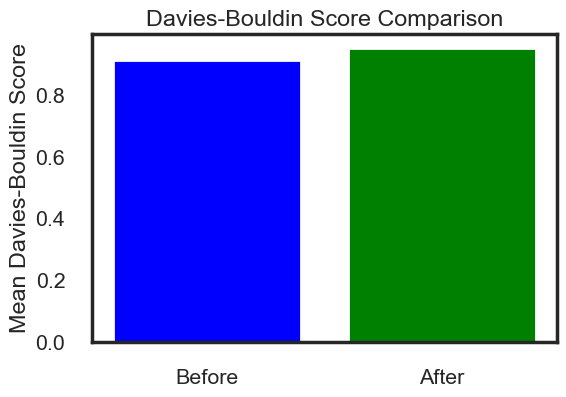

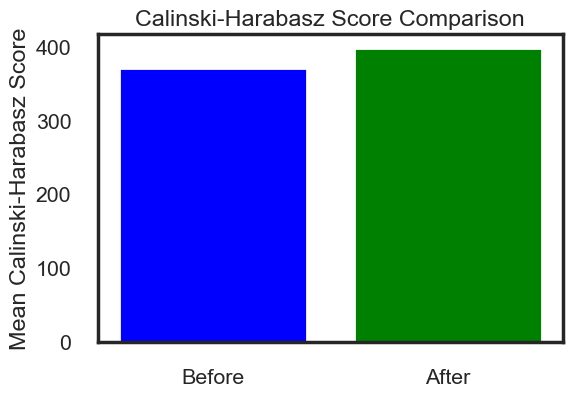

In [86]:
mean_scores_before = [np.mean(silhouette_scores1),
                      np.mean(davies_bouldin_scores1),
                      np.mean(calinski_harabasz_scores1)]

mean_scores_after = [np.mean(silhouette_scoresopt),
                     np.mean(davies_bouldin_scoresopt),
                     np.mean(calinski_harabasz_scoresopt)]

metric_names = ['Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']

plt.figure(figsize=(6, 4))
plt.bar(['Before', 'After'], [mean_scores_before[0], mean_scores_after[0]],color=['blue', 'green'])
plt.title('Silhouette Score Comparison')
plt.ylabel('Mean Silhouette Score')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Before', 'After'], [mean_scores_before[1], mean_scores_after[1]],color=['blue', 'green'])
plt.title('Davies-Bouldin Score Comparison')
plt.ylabel('Mean Davies-Bouldin Score')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Before', 'After'], [mean_scores_before[2], mean_scores_after[2]],color=['blue', 'green'])
plt.title('Calinski-Harabasz Score Comparison')
plt.ylabel('Mean Calinski-Harabasz Score')
plt.show()

# Trying a supervised algorithm before Profiling

## 4 class MLP 

In [87]:
data_nullvals_eliminated_kplus
X = data_nullvals_eliminated_kplus.drop(columns=['Clusters'])  
y = data_nullvals_eliminated_kplus['Clusters'] 
y = to_categorical(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X.shape[1])) 
model.add(Dense(y.shape[1], activation='softmax'))  
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
epochs = 50 
batch_size = 32  
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
50/50 [==============================] - 1s 4ms/step - loss: 0.8034 - accuracy: 0.7398 - val_loss: 0.4988 - val_accuracy: 0.8870
Epoch 2/50
50/50 [==============================] - 0s 1ms/step - loss: 0.3559 - accuracy: 0.9143 - val_loss: 0.3030 - val_accuracy: 0.9435
Epoch 3/50
50/50 [==============================] - 0s 1ms/step - loss: 0.2367 - accuracy: 0.9401 - val_loss: 0.2237 - val_accuracy: 0.9492
Epoch 4/50
50/50 [==============================] - 0s 1ms/step - loss: 0.1818 - accuracy: 0.9515 - val_loss: 0.1851 - val_accuracy: 0.9661
Epoch 5/50
50/50 [==============================] - 0s 1ms/step - loss: 0.1507 - accuracy: 0.9603 - val_loss: 0.1592 - val_accuracy: 0.9661
Epoch 6/50
50/50 [==============================] - 0s 1ms/step - loss: 0.1297 - accuracy: 0.9653 - val_loss: 0.1445 - val_accuracy: 0.9605
Epoch 7/50
50/50 [==============================] - 0s 1ms/step - loss: 0.1147 - accuracy: 0.9723 - val_loss: 0.1326 - val_accuracy: 0.9605
Epoch 8/50
50/50 [==

 1/14 [=>............................] - ETA: 0s

14/14 [==============================] - 0s 894us/step


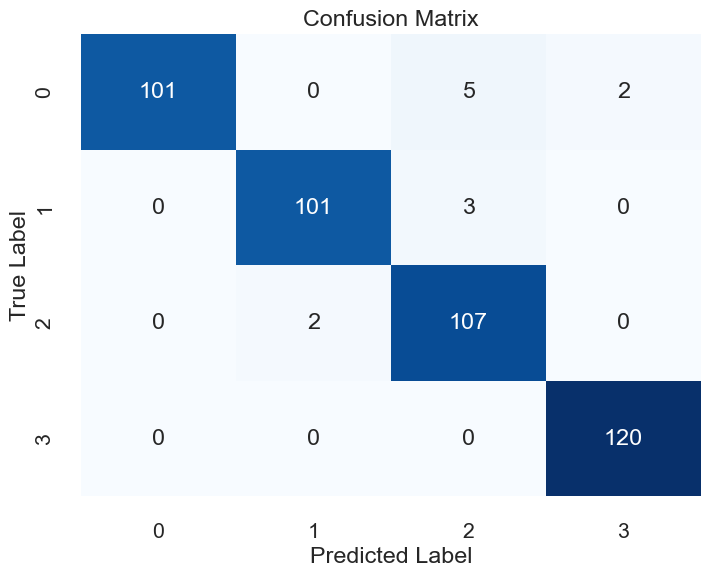

In [88]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 3 class MLP

In [89]:
data_nullvals_eliminated_kplus2
X = data_nullvals_eliminated_kplus2.drop(columns=['Clusters'])  
y = data_nullvals_eliminated_kplus2['Clusters'] 
y = to_categorical(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X.shape[1])) 
model.add(Dense(y.shape[1], activation='softmax'))  
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
epochs = 50 
batch_size = 32  
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
50/50 [==============================] - 1s 3ms/step - loss: 0.6987 - accuracy: 0.7013 - val_loss: 0.4058 - val_accuracy: 0.8644
Epoch 2/50
50/50 [==============================] - 0s 1ms/step - loss: 0.2611 - accuracy: 0.9225 - val_loss: 0.2502 - val_accuracy: 0.9153
Epoch 3/50
50/50 [==============================] - 0s 1ms/step - loss: 0.1644 - accuracy: 0.9628 - val_loss: 0.1931 - val_accuracy: 0.9379
Epoch 4/50
50/50 [==============================] - 0s 1ms/step - loss: 0.1216 - accuracy: 0.9716 - val_loss: 0.1642 - val_accuracy: 0.9492
Epoch 5/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0983 - accuracy: 0.9805 - val_loss: 0.1479 - val_accuracy: 0.9492
Epoch 6/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0829 - accuracy: 0.9849 - val_loss: 0.1345 - val_accuracy: 0.9492
Epoch 7/50
50/50 [==============================] - 0s 1ms/step - loss: 0.0724 - accuracy: 0.9868 - val_loss: 0.1260 - val_accuracy: 0.9492
Epoch 8/50
50/50 [==

14/14 [==============================] - 0s 740us/step


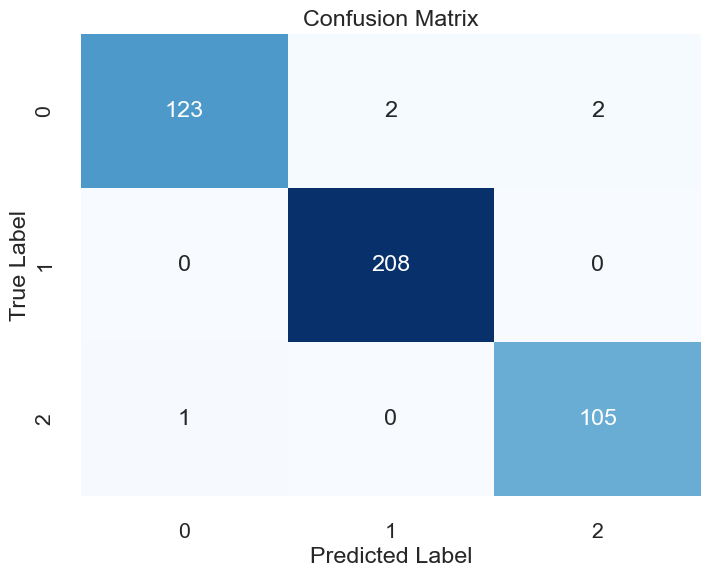

In [877]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Customer Segmentation/Profiling

## Analysis for 4 class Clustering 

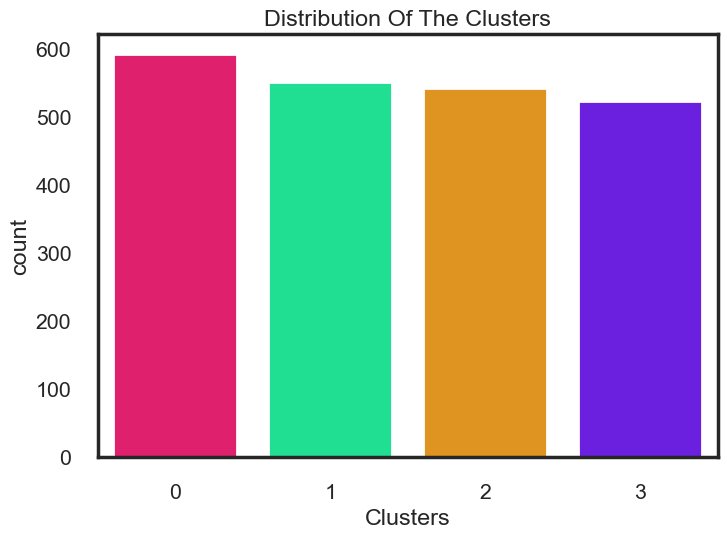

In [878]:
pal = ["#FF0066", "#00FF99", "#FF9900", "#6600FF"] 
pl = sns.countplot(x=data_nullvals_eliminated_kplus["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

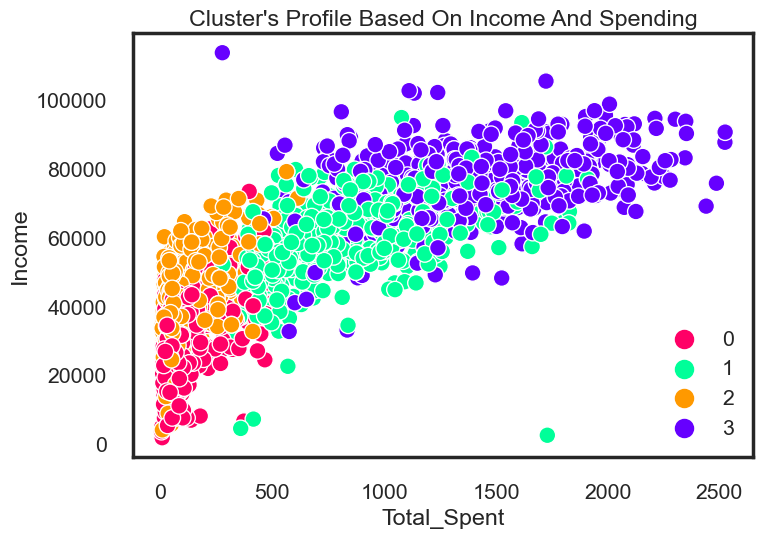

In [879]:
p = sns.scatterplot(data = data_nullvals_eliminated_kplus,x=data_nullvals_eliminated_kplus["Total_Spent"], y=data_nullvals_eliminated_kplus["Income"],hue=data_nullvals_eliminated_kplus["Clusters"], palette= pal)
p.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

### Group 0: Low Income level, Low spending level
### Group 1: Average Income level, High spending level
### Group 2: Sub-middle-low Income level, Low spending level
### Group 3: High Income level, High spending level

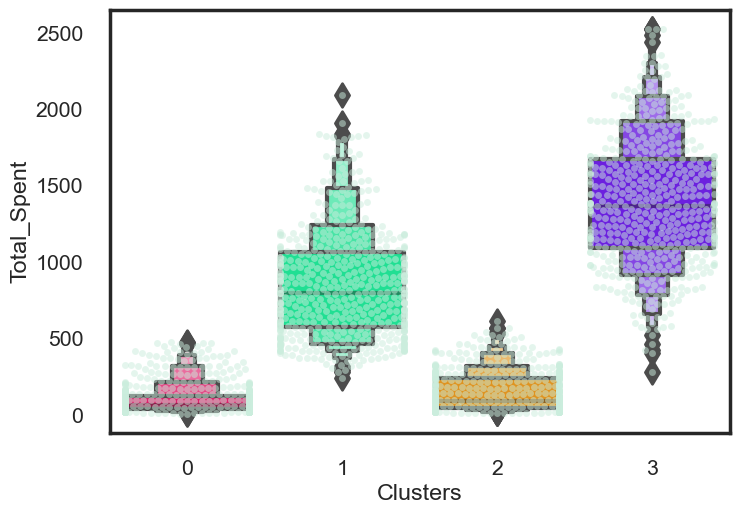

In [880]:
plt.figure()
pl=sns.swarmplot(x=data_nullvals_eliminated_kplus["Clusters"], y=data_nullvals_eliminated_kplus["Total_Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data_nullvals_eliminated_kplus["Clusters"], y=data_nullvals_eliminated_kplus["Total_Spent"], palette=pal)
plt.show()

### Group 0: Spending range 0-500
### Group 1: Spending range 500-1800
### Group 2: Spending range 0-500
### Group 3: Spending range 550-2500

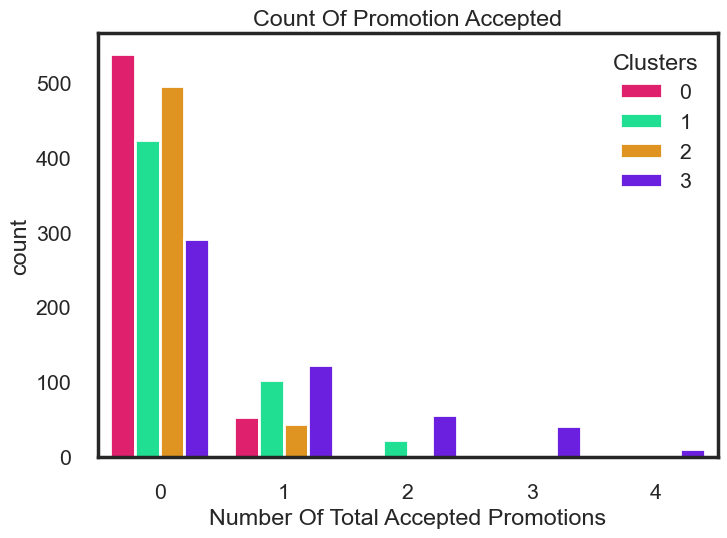

In [881]:
data_nullvals_eliminated_kplus["Total_Campaigns"] = data_nullvals_eliminated_kplus["AcceptedCmp1"]+ data_nullvals_eliminated_kplus["AcceptedCmp2"]+ data_nullvals_eliminated_kplus["AcceptedCmp3"]+ data_nullvals_eliminated_kplus["AcceptedCmp4"]+ data_nullvals_eliminated_kplus["AcceptedCmp5"]
plt.figure()
pl = sns.countplot(x=data_nullvals_eliminated_kplus["Total_Campaigns"],hue=data_nullvals_eliminated_kplus["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

# Profiling

<Figure size 800x550 with 0 Axes>

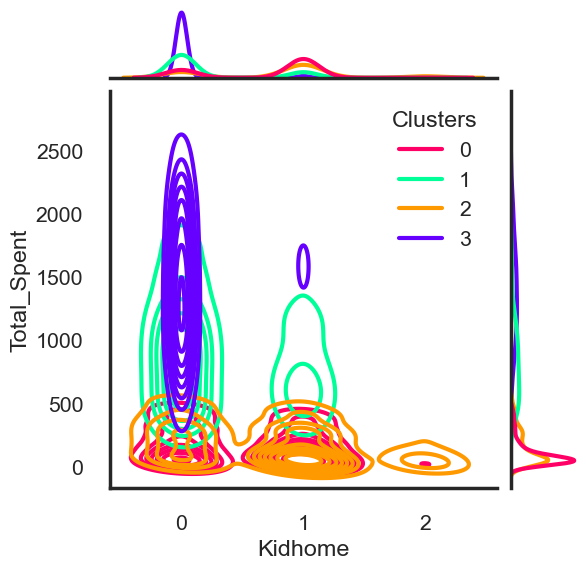

<Figure size 800x550 with 0 Axes>

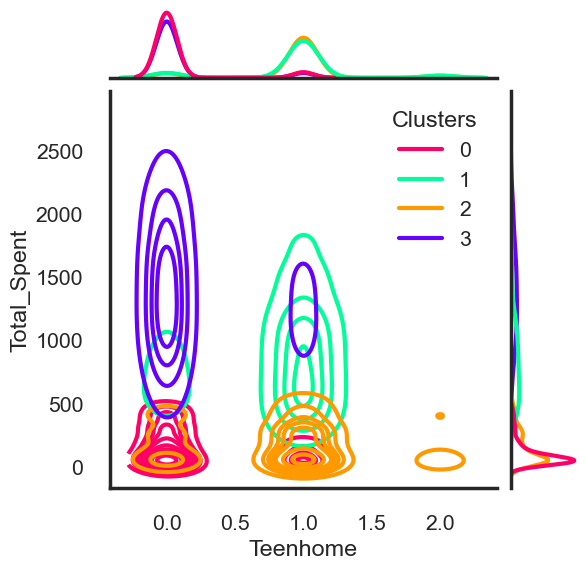

<Figure size 800x550 with 0 Axes>

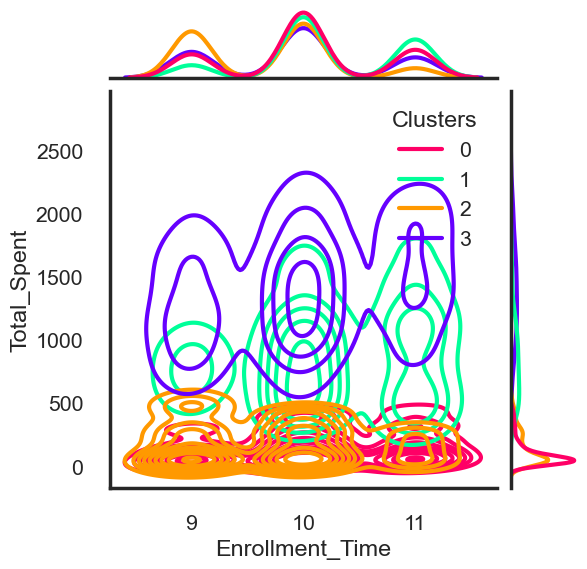

<Figure size 800x550 with 0 Axes>

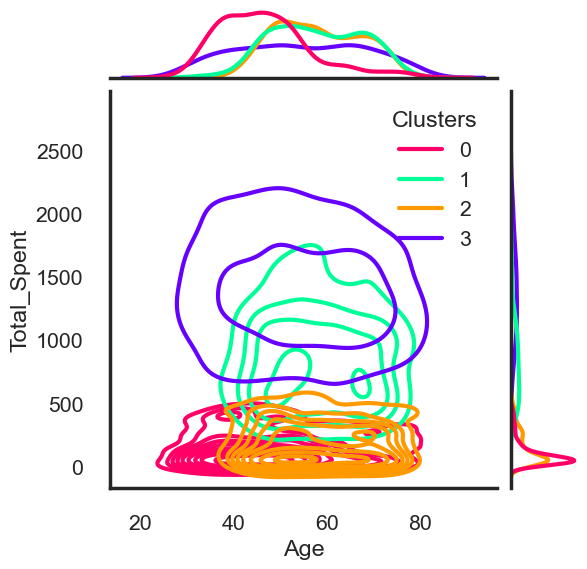

<Figure size 800x550 with 0 Axes>

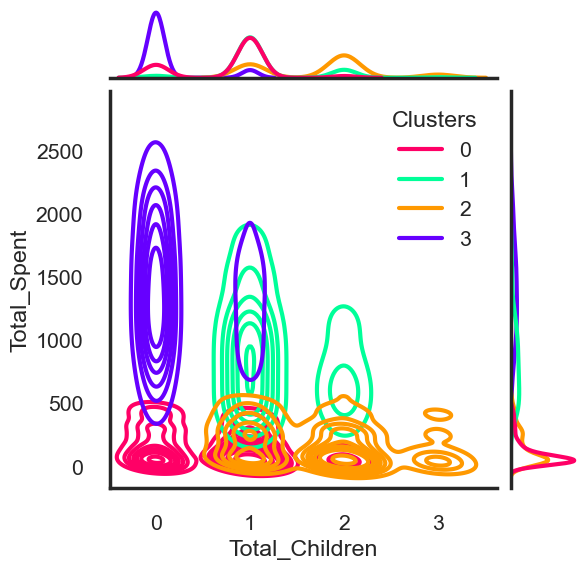

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

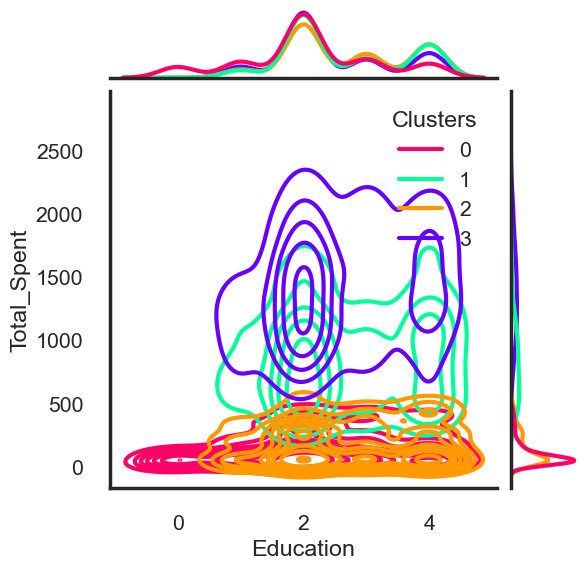

<Figure size 800x550 with 0 Axes>

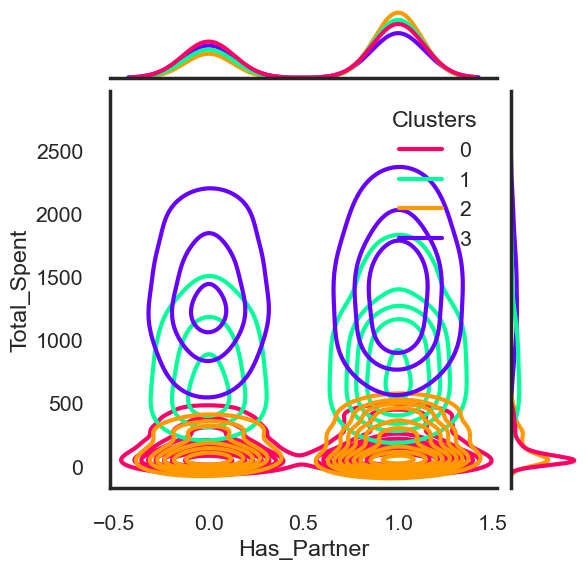

In [882]:
Personal = [ "Kidhome","Teenhome","Enrollment_Time", "Age", "Total_Children", "Family_Size", "Education","Has_Partner"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data_nullvals_eliminated_kplus[i], y=data_nullvals_eliminated_kplus["Total_Spent"], hue =data_nullvals_eliminated_kplus["Clusters"], kind="kde", palette=pal)
    plt.show()

### Profiling Summary for 4 Class Clustering:

## Group 0:

- Either has no children or only one, the family population is usually 2-3 people.
- The number of teens in the house is at most 1, usually 0.
- Members of the company for an average of 10+ years.
- General age ranges are 25-50.
- Education levels are widely available from all walks of life
- Partner information is not widely uniform, both single and together are available.
- Income levels are between 5000-40000, spending ranges are 0-500.
- Campaign acceptance rate is too low

## Group 1:

- Most of them do not have children. The family population is usually 2-3 people.
- The number of teenagers in the house is usually 1.
- They have been members of the company for an average of 10 years.
- General age ranges are 40-80.
- Education levels are common: Graduation and Phd, in short, most are university graduates.
- Partner information is not widely uniform, both single and together are available.
- Income levels are between 42000-78000, spending ranges are 500-1800.
- Campaign acceptance rate is medium-low.

## Group 2:

- Most of them have 1 child, the family population is usually 3-4 people.
- The maximum number of teenagers in the house is 2, usually 1.
- They have been members of the company for an average of 9+ years.
- General age ranges are 40-80.
- Education levels are mostly university graduates.
- Even though there are singles, most of them are together.
- Income levels are between 40000-75000, spending ranges are 0-500.
- Campaign acceptance rate is very low.

## Group 3:

- The vast majority of them do not have children, the family population is generally 1-2 people.
- The number of teenagers in the house is generally 0.
- They have been members of the company for an average of 10 years.
- General age ranges are 25-80.
- Education levels commonly include Graduation, university graduate.
- There are those who are single and those who are together.
- Income levels are between 65000-90000, spending ranges are 550-2500.
- Campaign acceptance rate is high.

## Analysis for 3 class Clustering 

In [883]:
pl = sns.countplot(x=data_nullvals_eliminated_kplus2["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

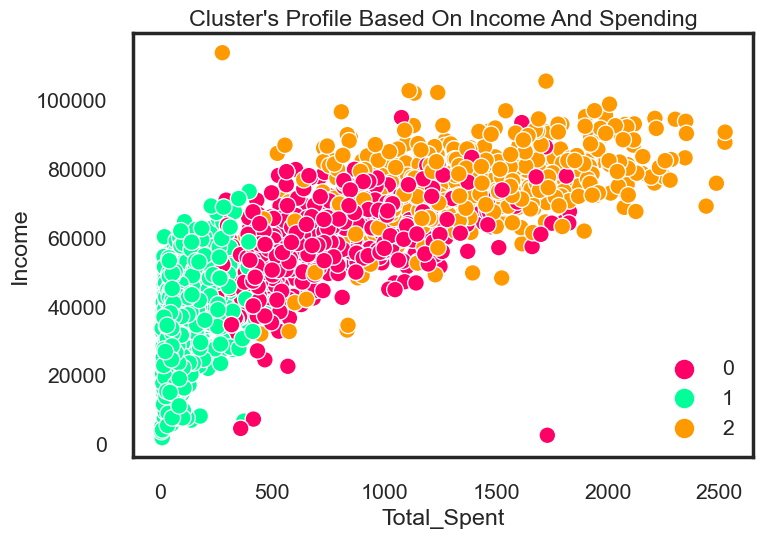

In [884]:
p = sns.scatterplot(data = data_nullvals_eliminated_kplus2,x=data_nullvals_eliminated_kplus2["Total_Spent"], y=data_nullvals_eliminated_kplus2["Income"],hue=data_nullvals_eliminated_kplus2["Clusters"], palette= pal)
p.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

### Group 0: Medium Income level, Medium spending level
### Group 1: Low Income level, Low spending level
### Group 2: High Income level, High spending level

In [885]:
plt.figure()
pl=sns.swarmplot(x=data_nullvals_eliminated_kplus2["Clusters"], y=data_nullvals_eliminated_kplus2["Total_Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data_nullvals_eliminated_kplus2["Clusters"], y=data_nullvals_eliminated_kplus2["Total_Spent"], palette=pal)
plt.show()

### Group 0: Spending range 400-1700
### Group 1: Spending range 0-500
### Group 2: Spending range 500-2500

In [886]:
data_nullvals_eliminated_kplus2["Total_Campaigns"] = data_nullvals_eliminated_kplus2["AcceptedCmp1"]+ data_nullvals_eliminated_kplus2["AcceptedCmp2"]+ data_nullvals_eliminated_kplus2["AcceptedCmp3"]+ data_nullvals_eliminated_kplus2["AcceptedCmp4"]+ data_nullvals_eliminated_kplus2["AcceptedCmp5"]
plt.figure()
pl = sns.countplot(x=data_nullvals_eliminated_kplus2["Total_Campaigns"],hue=data_nullvals_eliminated_kplus2["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

# Profiling

<Figure size 800x550 with 0 Axes>

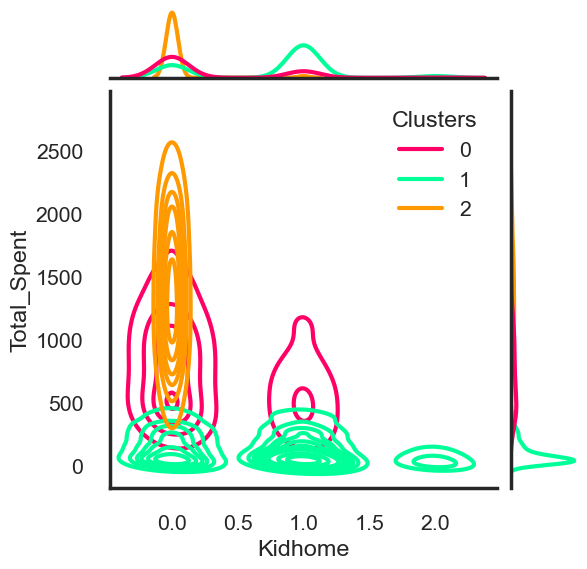

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

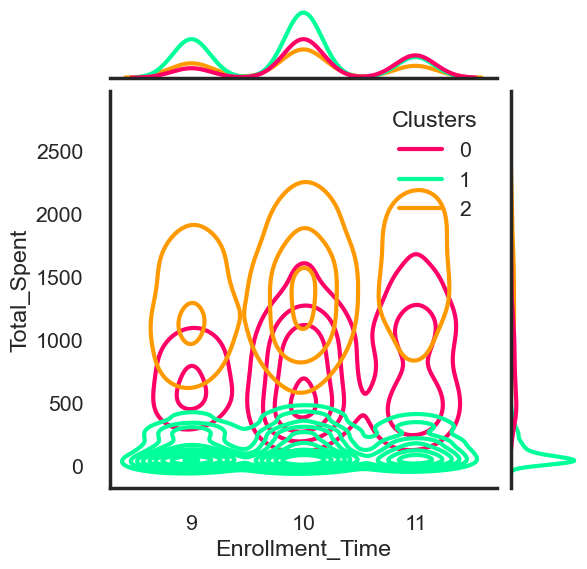

<Figure size 800x550 with 0 Axes>

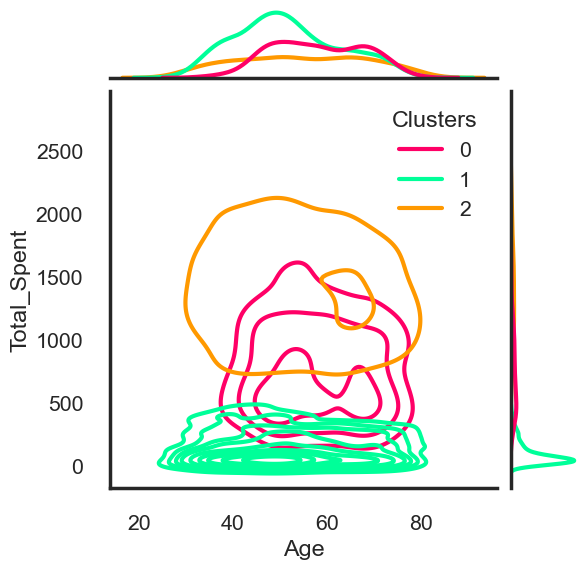

<Figure size 800x550 with 0 Axes>

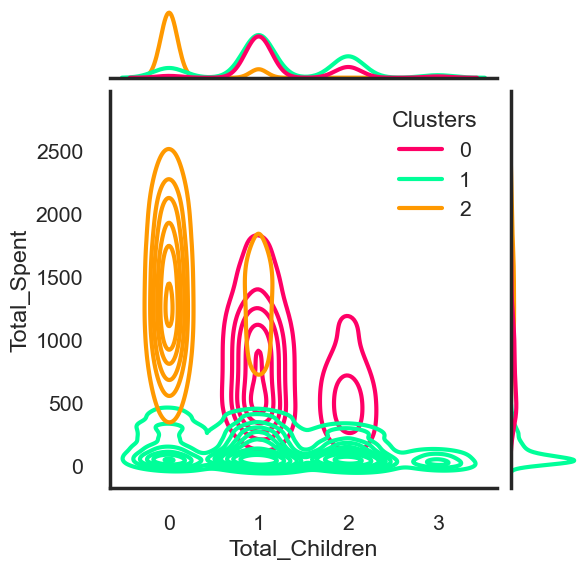

<Figure size 800x550 with 0 Axes>

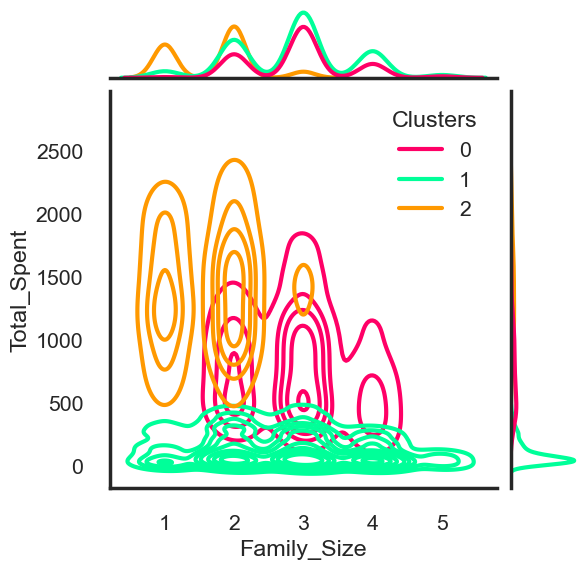

<Figure size 800x550 with 0 Axes>

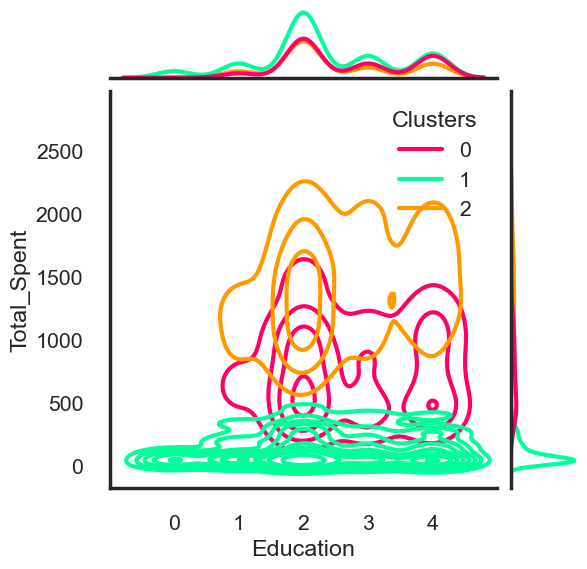

<Figure size 800x550 with 0 Axes>

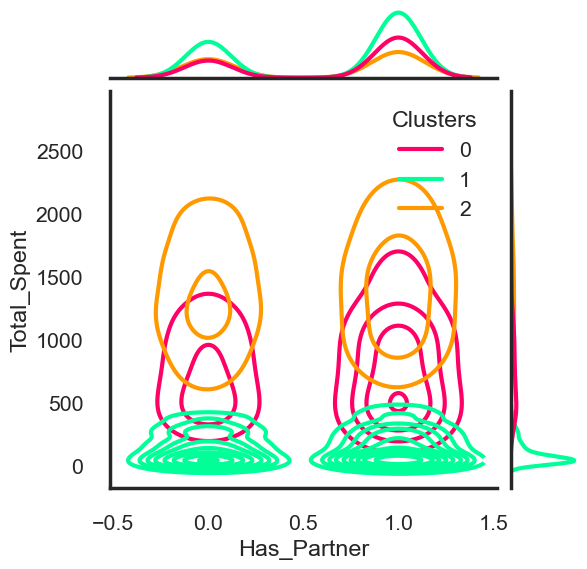

In [887]:
Personal = [ "Kidhome","Teenhome","Enrollment_Time", "Age", "Total_Children", "Family_Size", "Education","Has_Partner"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data_nullvals_eliminated_kplus2[i], y=data_nullvals_eliminated_kplus2["Total_Spent"], hue =data_nullvals_eliminated_kplus2["Clusters"], kind="kde", palette=pal)
    plt.show()

### Profiling Summary for 3 Class Clustering:

## Group 0:

- They either have no children or have at most 1, the family population is usually 3 people.
- The maximum number of teenagers in the house is 2, usually 1.
- Members of the company for an average of 10+ years.
- General age ranges are 38-80.
- Education levels are mostly university graduates.
- Even though there are singles, most of them are together.
- Income levels are between 35000-80000, spending ranges are 400-1700.
- Campaign acceptance rate is low.

## Group 1:

- The number of children is at least 0, at most 2, generally with 1 child, the family population is usually 2-5 people.
- The number of teenagers in the house is generally 0-1.
- They have been members of the company for an average of 10 years.
- General age ranges are 25-80.
- Education levels are widely available at all levels.
- Partner information single-together evenly distributed.
- Income levels are 0-65000, spending ranges are 0-500.
- Campaign acceptance rate is low.

## Group 2:

- The majority of them do not have children, the family population is generally 1-2 people.
- The number of teens in the house is at most 1, usually 0.
- They have been members of the company for an average of 10 years.
- General age ranges are 30-80.
- Education levels are mostly university graduates.
- Partner information single-together evenly distributed.
- Income levels are between 60000-90000, spending ranges are 500-2500.
- Campaign acceptance rate is high.